# **Problem Statement**

**Predicting the Demand for Shared Electric Cycles (Yulu)**
- Yulu, a leading micro-mobility service provider in India, has revolutionized short-distance travel by offering eco-friendly, shared electric cycles for daily commuting. These services aim to reduce traffic congestion and pollution by providing a safe, convenient, and affordable alternative to motor vehicles. Despite a successful start, Yulu has recently observed a noticeable dip in its revenues, indicating a possible fluctuation in user demand.

- To address this issue, Yulu has collaborated with a consulting firm to uncover the key factors influencing the demand for its shared electric cycles. This analysis will help the company align its operations and marketing efforts to match customer needs and optimize availability during peak demand periods.

**Objective**
- The primary objective of this analysis is to identify and quantify the significant factors that influence the demand for shared electric cycles in the Indian market. Specifically, we aim to:

- Understand how variables such as weather, temperature, season, holidays, and working days affect the number of cycle rentals.

- Perform statistical hypothesis testing to validate whether observed differences in demand under various conditions are significant.

- Provide actionable insights and recommendations for optimizing resource allocation and improving user experience.

**Dataset Overview**

- datetime: Timestamp of the rental record

- season: Categorical (1: Spring, 2: Summer, 3: Fall, 4: Winter)

- holiday: Indicates if the day is a holiday (Yes/No)

- workingday: Indicates if the day is a working day (Yes/No)

- weather: Categorical (1 to 4 based on severity)

- temp / atemp: Actual and perceived temperatures in Celsius

- humidity / windspeed: Environmental factors

- casual / registered: Number of casual and registered users

- count: Total number of rented cycles (dependent variable)

# **Import the necessary libraries & Basic Analysis**

In [ ]:
import numpy as np  # Importing NumPy for numerical operations
import pandas as pd  # Importing Pandas for data manipulation and analysis
import seaborn as sns  # Importing Seaborn for advanced data visualization
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting
import math # Importing math for mathematial functions

from scipy.stats import shapiro  # Importing Shapiro-Wilk test for normality
from statsmodels.api import qqplot  # Importing QQ plot function for checking normality visually
from scipy.stats import ttest_ind  # Importing independent t-test for comparing two group means
from scipy.stats import levene  # Importing Levene’s test for checking equality of variances
from scipy.stats import kruskal  # Importing Kruskal-Wallis test for non-parametric group comparison
from scipy.stats import f_oneway  # Importing one-way ANOVA for comparing means of multiple groups
from scipy.stats import chi2_contingency  # Importing Chi-square test of independence for categorical variables

import warnings  # Importing warnings module to manage warning messages
warnings.filterwarnings('ignore')  # Suppressing all warning messages for cleaner output

In [ ]:
df = pd.read_csv('/content/bike_sharing.csv') #Reading the dataset

In [ ]:
df.shape #It gives shape of the data

(10886, 12)

The dataset is of 10886 rows and 12 columns

In [ ]:
df.dtypes #this is used to check the data types of the columns

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns  # Selecting columns with categorical (object) data types
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns  # Selecting columns with numerical (int64, float64) data types

In [ ]:
categorical_columns

Index(['datetime'], dtype='object')

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime']) #Converted datetime column to datetime format

In [ ]:
# Creating new columns from datetime and converting them to categories

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [ ]:
df.info() #It gives information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
dtypes: datetime64[ns](1), 

In [ ]:
df.describe() # Using it to get the statistical summary

datetime        season       holiday  \
count                          10886  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968      2.506614      0.028569   
min              2011-01-01 00:00:00      1.000000      0.000000   
25%              2011-07-02 07:15:00      2.000000      0.000000   
50%              2012-01-01 20:30:00      3.000000      0.000000   
75%              2012-07-01 12:45:00      4.000000      0.000000   
max              2012-12-19 23:00:00      4.000000      1.000000   
std                              NaN      1.116174      0.166599   

         workingday       weather         temp         atemp      humidity  \
count  10886.000000  10886.000000  10886.00000  10886.000000  10886.000000   
mean       0.680875      1.418427     20.23086     23.655084     61.886460   
min        0.000000      1.000000      0.82000      0.760000      0.000000   
25%        0.000000      1.000000     13.94000     16.665000     47.000000   
50%        1.000000      1.000000     20.50000     24.240000     62.000000   
75%        1.000000      2.000000     26.24000     31.060000     77.000000   
max        1.000000      4.000000     41.00000     45.455000    100.000000   
std        0.466159      0.633839      7.79159      8.474601     19.245033   

          windspeed        casual    registered         count          year  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      12.799395     36.021955    155.552177    191.574132   2011.501929   
min        0.000000      0.000000      0.000000      1.000000   2011.000000   
25%        7.001500      4.000000     36.000000     42.000000   2011.000000   
50%       12.998000     17.000000    118.000000    145.000000   2012.000000   
75%       16.997900     49.000000    222.000000    284.000000   2012.000000   
max       56.996900    367.000000    886.000000    977.000000   2012.000000   
std        8.164537     49.960477    151.039033    181.144454      0.500019   

              month           day          hour  
count  10886.000000  10886.000000  10886.000000  
mean       6.521495      9.992559     11.541613  
min        1.000000      1.000000      0.000000  
25%        4.000000      5.000000      6.000000  
50%        7.000000     10.000000     12.000000  
75%       10.000000     15.000000     18.000000  
max       12.000000     19.000000     23.000000  
std        3.444373      5.476608      6.915838

In [ ]:
df.select_dtypes(include=['number']).skew()  # Calculating skewness of all numerical columns in the DataFrame

season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
year         -0.007717
month        -0.005237
day           0.001182
hour         -0.009125
dtype: float64

In [ ]:
#Lets check for null values

df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
dtype: int64

In [ ]:
#Lets check for duplicate values
df.duplicated().sum()

np.int64(0)

### Data Shape
- The dataset contains **10,886 rows** and **12 columns**, indicating a large and rich dataset ideal for uncovering meaningful patterns in electric bike rental demand.

---

### Initial Data Types and Cleaning
- Initially, the datetime column was of type object. It has now been **converted to proper datetime format**.
- No **null** values or **duplicate rows** were found, so **no imputation or data removal** was required.
- New time-based features extracted from datetime:  
  - year, month, day, and hour - useful for temporal analysis.

---

### Descriptive Statistics (df.describe)

**datetime**
- Spans from **1 Jan 2011** to **19 Dec 2012** — nearly **2 years** of hourly rental data.

**season**
- Values range from **1 (Spring)** to **4 (Winter)**.
- **Mean == 2.5**, **Median = 3** → Difference = **0.5**
- **Skewness == -0.007** -> Distribution is **nearly symmetric**.
- → **Seasons are evenly distributed** in the dataset.

**holiday**
- **Mean = 0.03**, **Median = 0** -> Difference = **0.03**
- **Skewness == 5.66** -> **Highly right-skewed**, indicating holidays are **rare**.

**workingday**
- **Mean == 0.68**, **Median = 1** -> Difference = **0.32**
- **Skewness ≈ -0.78** -> **Left-skewed**, as most days are **working days**.

**weather**
- Values from **1 (Clear)** to **4 (Severe)**.
- **Mean = 1.41**, **Median = 1** → Difference = **0.41**
- **Skewness = 1.24**. **Moderate right skew**, most days are **clear or mildly cloudy**.

**temp**
- Ranges: **0.82°C - 41°C**
- **Mean ≈ 20.23°C**, **Median = 20.5°C** → Difference = **-0.27°C**
- **Skewness ≈ 0.004** -> **Symmetric** distribution.

**atemp**
- **Mean = 23.65°C**, **Median = 24.24°C** -> Difference = **-0.59°C**
- **Skewness = -0.10** -> Slight **left-skew**, close to normal.

**humidity**
- Range: **0 - 100%**, **Mean = 62%**, **Median = 62%** -> Difference = **0**
- **Skewness = -0.086** -> Almost **perfectly symmetric**.


**windspeed**
- Range: **0 - 57**
- **Mean = 12.80**, **Median = 13.0** -> Difference = **-0.2**
- **Skewness = 0.59** -> Mild **right skew**.

**casual**
- Range: **0 - 367**
- **Mean = 36.02**, **Median = 17** -> Difference = **19.02**
- **Skewness = 2.50** -> **Highly right-skewed**, indicating **sporadic high spikes** in casual rentals.

**registered**
- Range: **0 - 886**
- **Mean = 155.55**, **Median = 118** -> Difference = **37.55**
- **Skewness = 1.52** -> **Moderate right skew**, registered users tend to rent in larger volumes.

**count**
- Range: **1 - 977**
- **Mean = 191.57**, **Median = 145** -> Difference = **46.57**
- **Skewness = 1.24** -> **Right-skewed**, indicating **occasional high demand periods**.

---

### Summary Comments
- Features like casual, registered, and count show **high skewness and large mean - median differences**, suggesting **outliers or peak demand periods**.
- Features like temp, atemp, and humidity are **fairly symmetric**, suitable for parametric analysis.
- holiday is very sparse and **imbalanced**, so statistical testing involving it may need caution.
- Overall, a mix of **balanced features** and **spiked demand indicators**, ideal for **both EDA and modeling**.

---

# **Univariate Analysis**

In [ ]:
# Loop through each column and print the number of unique values
for i in df.columns:
  print(f'\nThe number of unique values in column {i} is:\n' , df[i].nunique() , '\n')
  print('-'*30)


The number of unique values in column datetime is:
 10886 

------------------------------

The number of unique values in column season is:
 4 

------------------------------

The number of unique values in column holiday is:
 2 

------------------------------

The number of unique values in column workingday is:
 2 

------------------------------

The number of unique values in column weather is:
 4 

------------------------------

The number of unique values in column temp is:
 49 

------------------------------

The number of unique values in column atemp is:
 60 

------------------------------

The number of unique values in column humidity is:
 89 

------------------------------

The number of unique values in column windspeed is:
 28 

------------------------------

The number of unique values in column casual is:
 309 

------------------------------

The number of unique values in column registered is:
 731 

------------------------------

The number of unique values

In [ ]:
# replacing the number with category

# change of season
df['season'] = df['season'].replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

# change of holiday
df['holiday'] = df['holiday'].replace({0:'No',1:'Yes'})

# change of workingday
df['workingday'] = df['workingday'].replace({0:'No',1:'Yes'})

# change of month
df['month'] = df['month'].replace({1: 'January',
                                   2: 'February',
                                   3: 'March',
                                   4: 'April',
                                   5: 'May',
                                   6: 'June',
                                   7: 'July',
                                   8: 'August',
                                   9: 'September',
                                   10: 'October',
                                   11: 'November',
                                   12: 'December'})

In [ ]:
# Converting selected columns to categorical data type
cat_col = ['season', 'holiday', 'workingday', 'weather' , 'month']

for i in cat_col:
 df[i] = df[i].astype('category')

df.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
year                   int32
month               category
day                    int32
hour                   int32
dtype: object

In [ ]:
# Printing the unique values for each selected categorical column
selected_columns = ['season', 'holiday', 'workingday', 'weather']

for i in selected_columns:
  print(f'\nThe unique values in column {i} are: ' , df[i].unique())
  print('-'*50)


The unique values in column season are:  ['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Fall', 'Spring', 'Summer', 'Winter']
--------------------------------------------------

The unique values in column holiday are:  ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
--------------------------------------------------

The unique values in column workingday are:  ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
--------------------------------------------------

The unique values in column weather are:  [1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]
--------------------------------------------------


In [ ]:
# Printing normalized value counts (proportions) for each selected categorical column
selected_columns = ['season', 'holiday', 'workingday', 'weather']

for i in selected_columns:
  print(f'\nThe value counts in column {i} are:\n' , df[i].value_counts(normalize = True) , '\n')
  print('-'*30)


The value counts in column season are:
 season
Winter    0.251148
Fall      0.251056
Summer    0.251056
Spring    0.246739
Name: proportion, dtype: float64 

------------------------------

The value counts in column holiday are:
 holiday
No     0.971431
Yes    0.028569
Name: proportion, dtype: float64 

------------------------------

The value counts in column workingday are:
 workingday
Yes    0.680875
No     0.319125
Name: proportion, dtype: float64 

------------------------------

The value counts in column weather are:
 weather
1    0.660665
2    0.260334
3    0.078909
4    0.000092
Name: proportion, dtype: float64 

------------------------------


### **Outlier Detection and Treatment**

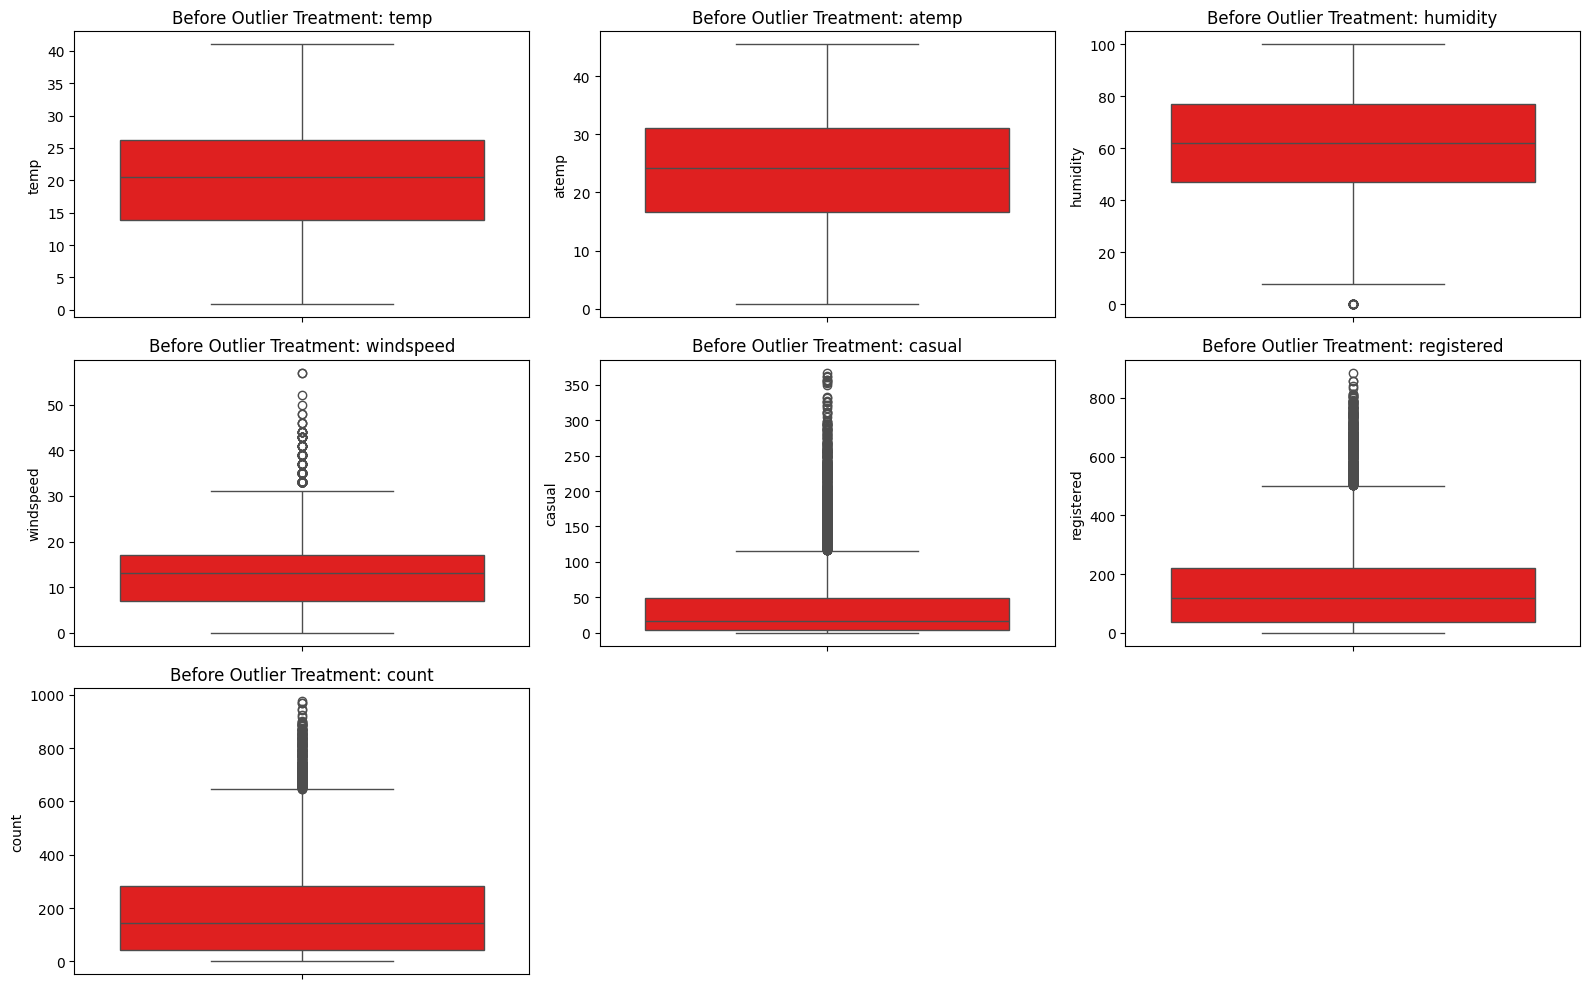

In [ ]:
selected_columns = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

# 1. Boxplots before outlier treatment
plt.figure(figsize=(16, 10))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col, color='red')
    plt.title(f'Before Outlier Treatment: {col}')
plt.tight_layout()
plt.show()

In [ ]:
# 2. Outlier treatment using IQR and 5th-95th percentile capping
for col in selected_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = df[col].quantile(0.05)  # 5th percentile
    upper_bound = df[col].quantile(0.95)  # 95th percentile

    df[col] = np.where(df[col] < Q1 - 1.5 * IQR, lower_bound, df[col])
    df[col] = np.where(df[col] > Q3 + 1.5 * IQR, upper_bound, df[col])

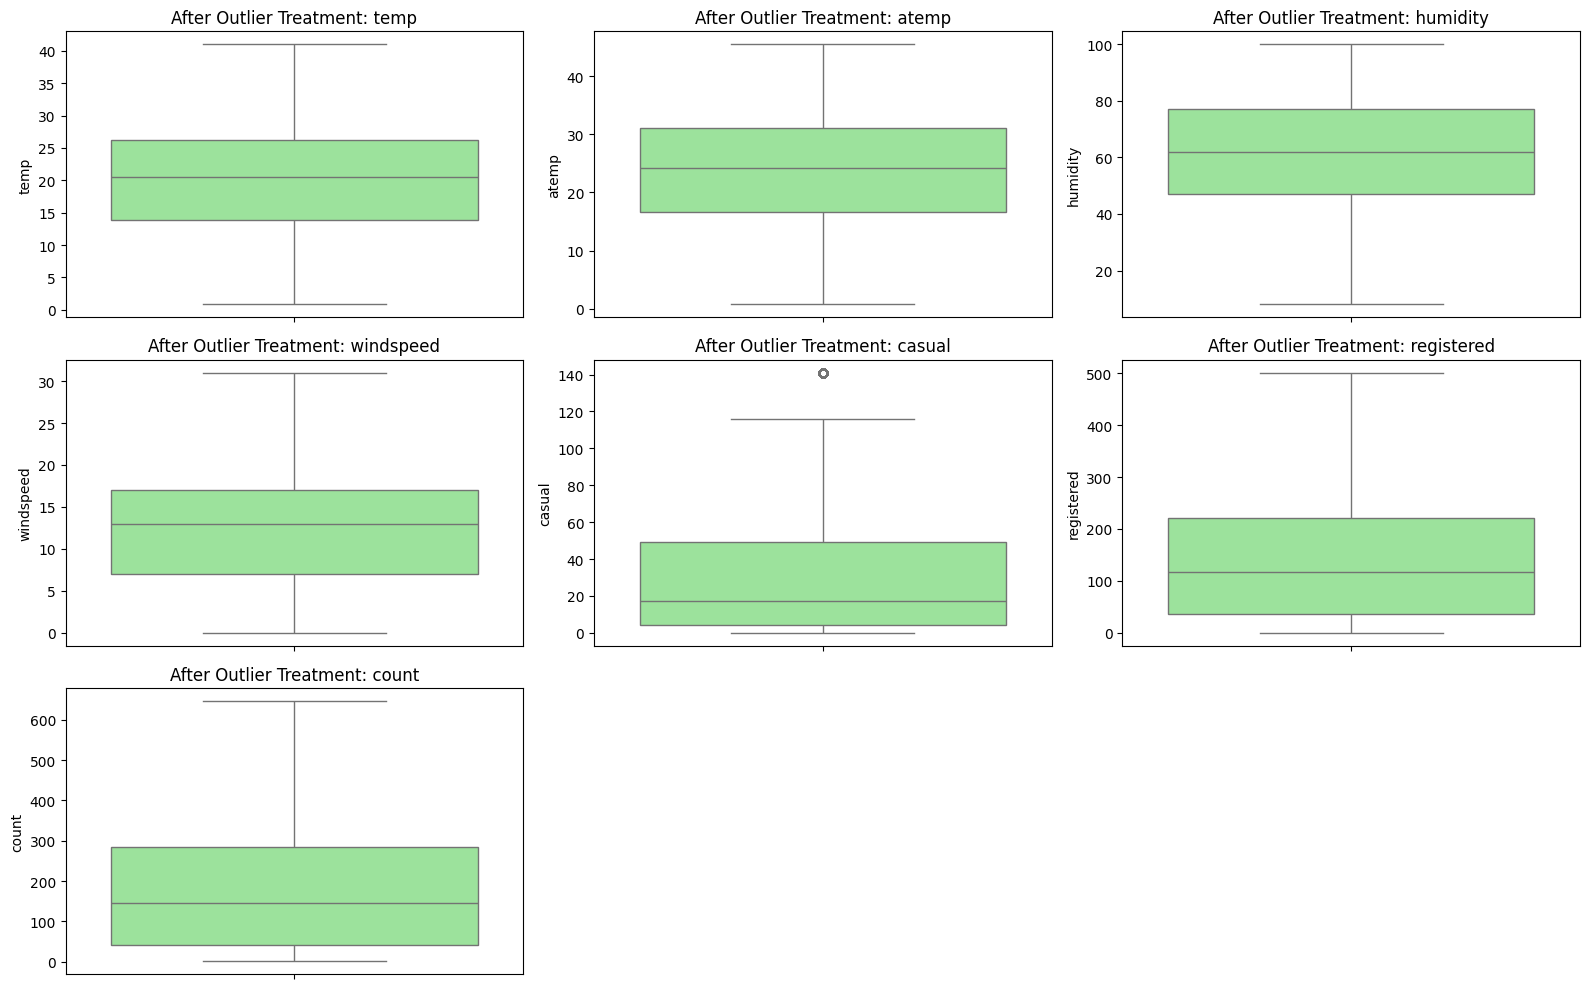

In [ ]:
# 3. Boxplots after outlier treatment
plt.figure(figsize=(16, 10))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f'After Outlier Treatment: {col}')
plt.tight_layout()
plt.show()

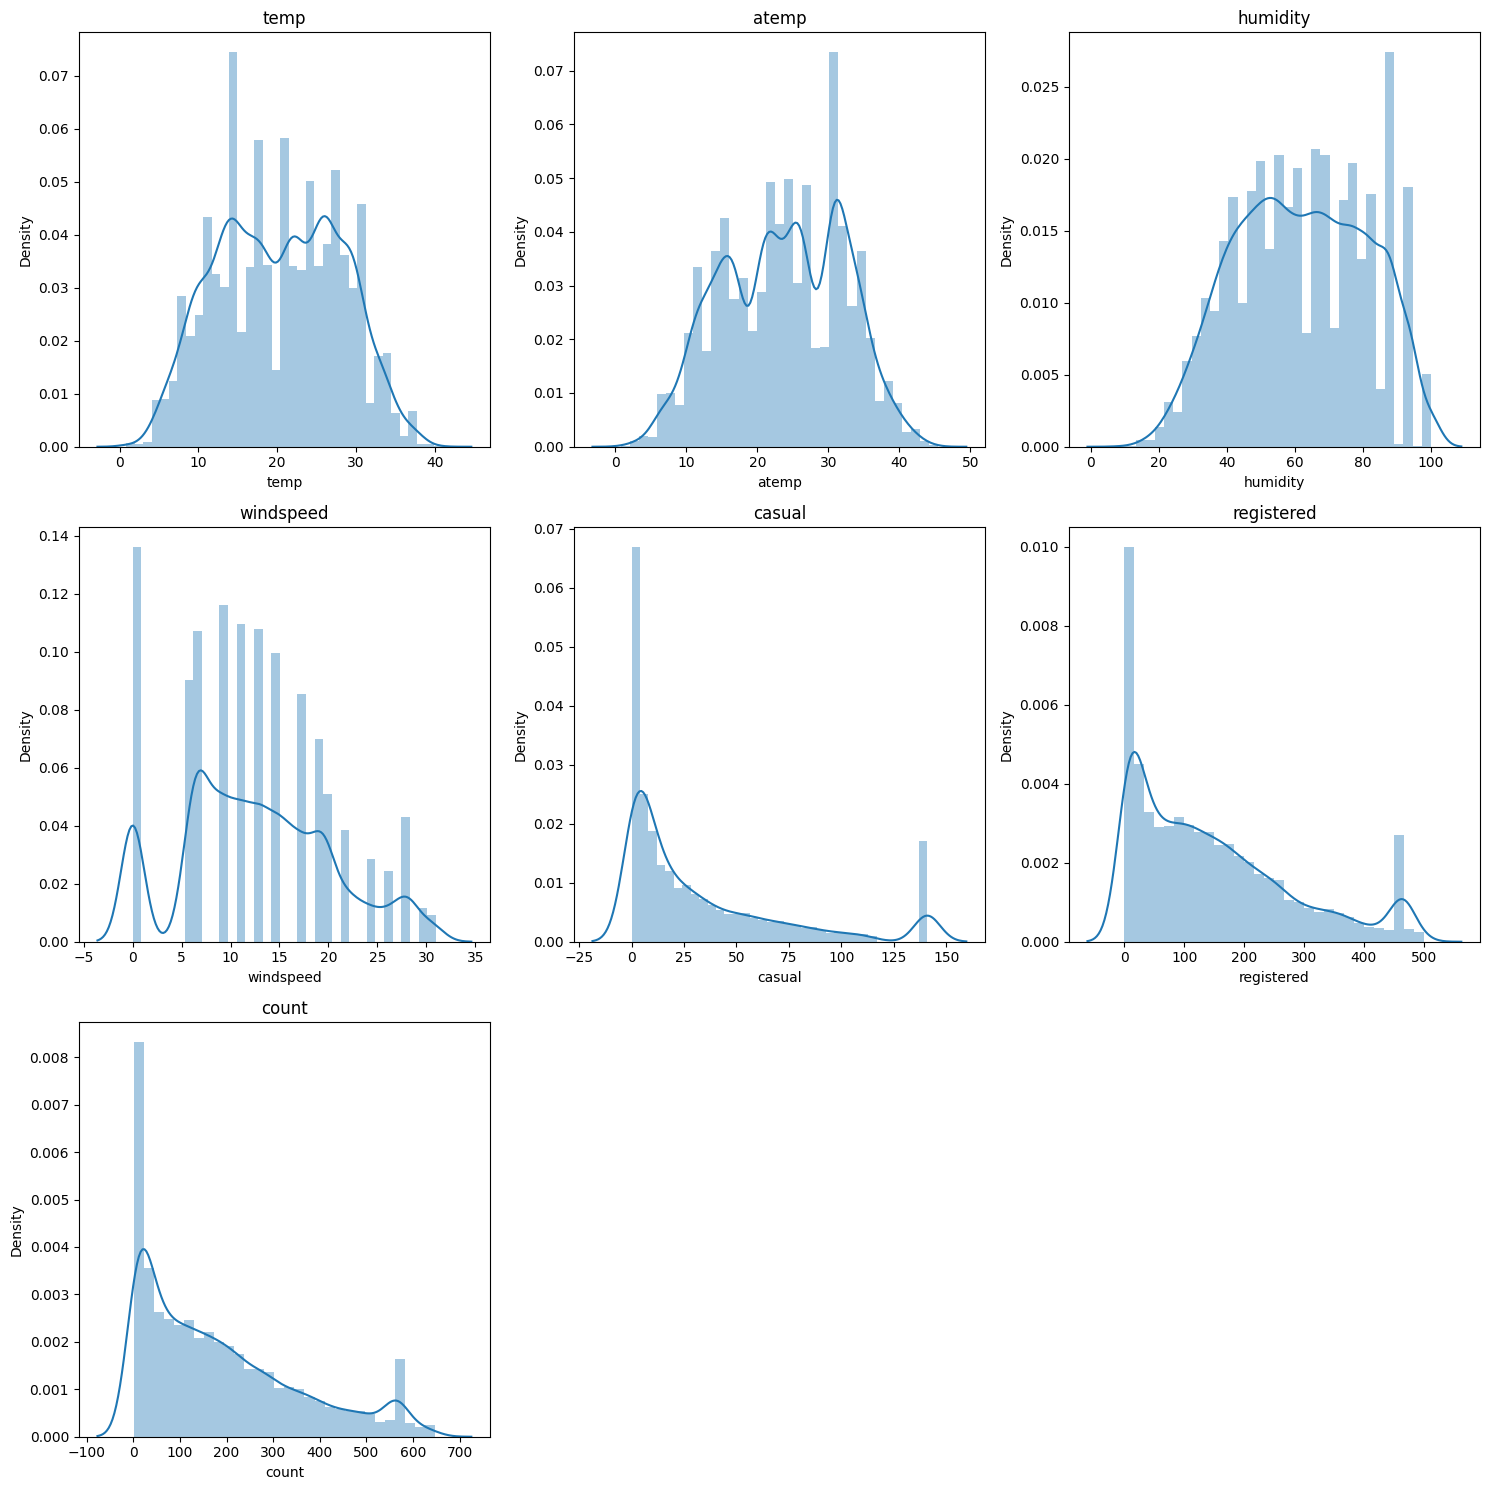

In [ ]:
# Plotting distribution plots with KDE for selected numerical columns in a grid layout
selected_columns = ['temp' , 'atemp' , 'humidity' , 'windspeed' , 'casual' , 'registered' , 'count']
n = len(selected_columns)
rows = math.ceil(n / 3)
plt.figure(figsize=(15, 5 * rows))


for i, col in enumerate(selected_columns):
    plt.subplot(rows, 3, i + 1)
    sns.distplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

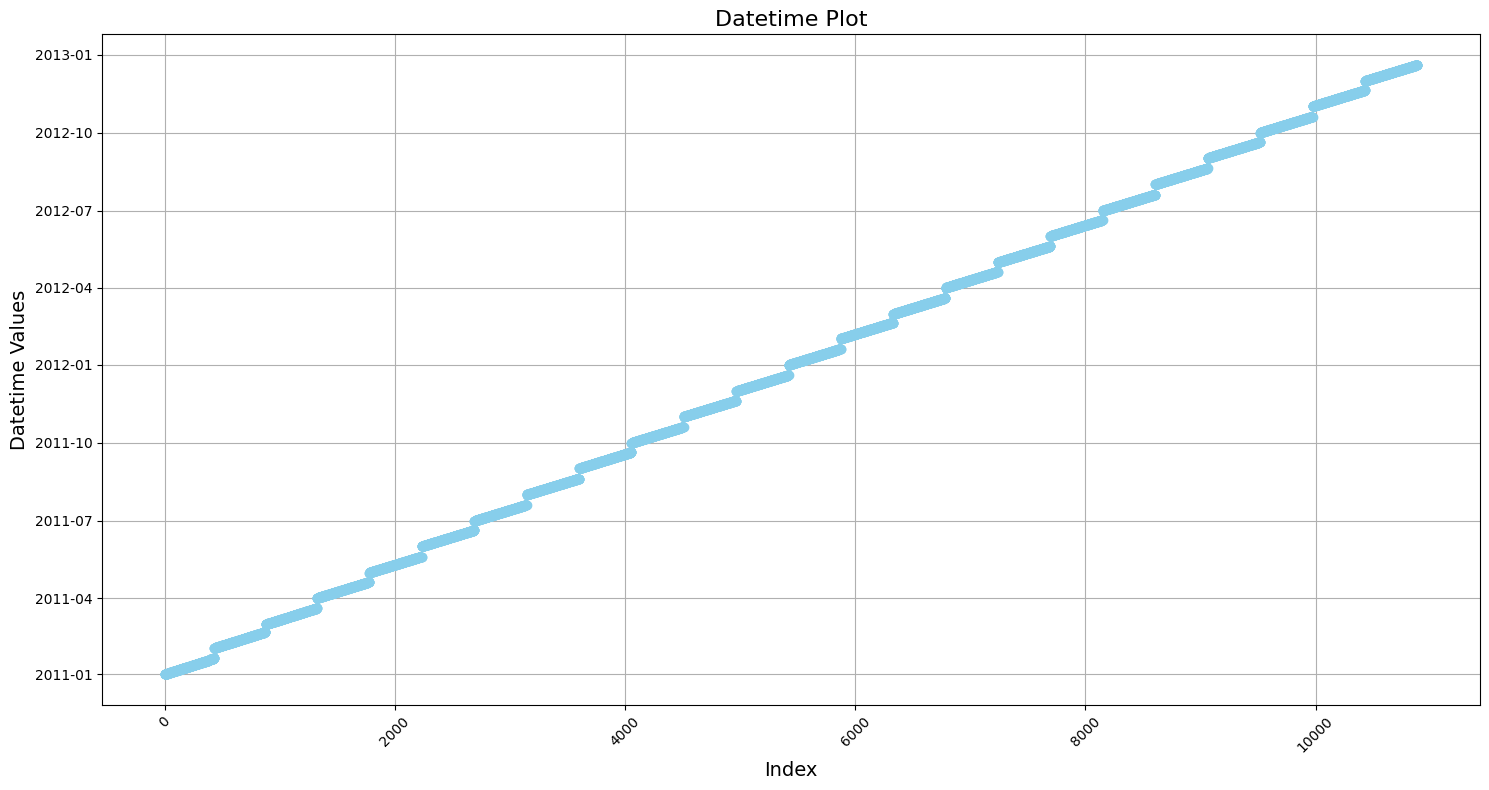

In [ ]:
# Plotting a line plot of the 'datetime' column to visualize its trend over the index
plt.figure(figsize=(15, 8))

plt.plot(df['datetime'], marker='o', linestyle='-', color='skyblue')

plt.title('Datetime Plot', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Datetime Values', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

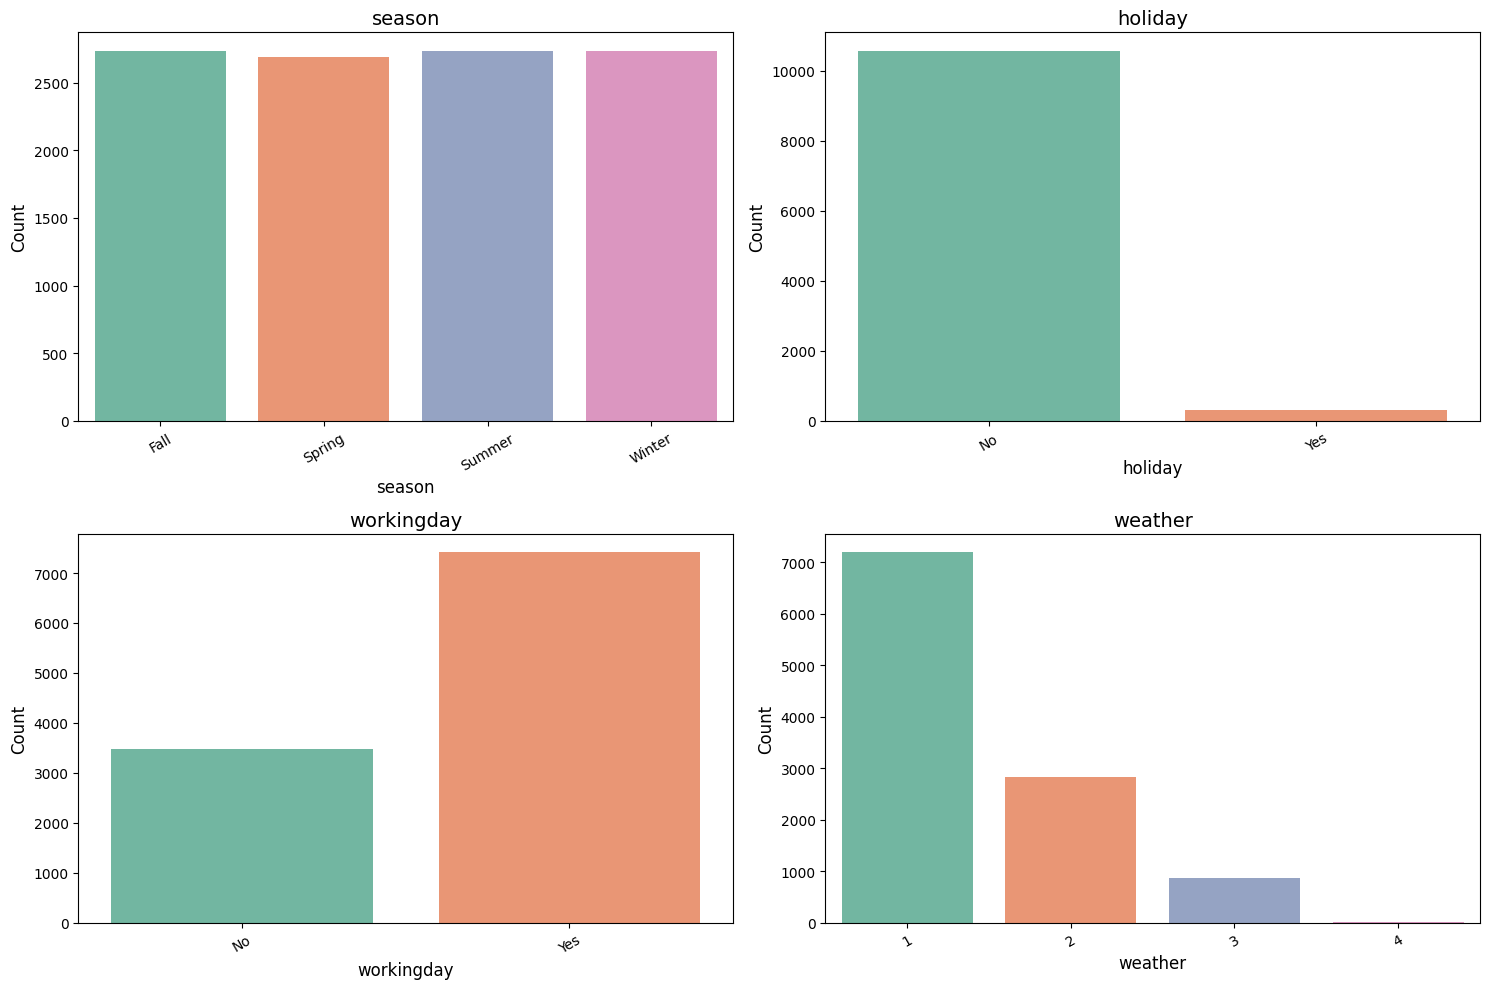

In [ ]:
# Plotting count plots for selected categorical columns to visualize their frequency distribution
selected_columns = ['season', 'holiday', 'workingday', 'weather']

n = len(selected_columns)
rows = math.ceil(n / 2)
plt.figure(figsize=(15, 5 * rows))

for i, col in enumerate(selected_columns):
    plt.subplot(rows, 2, i + 1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(col, fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

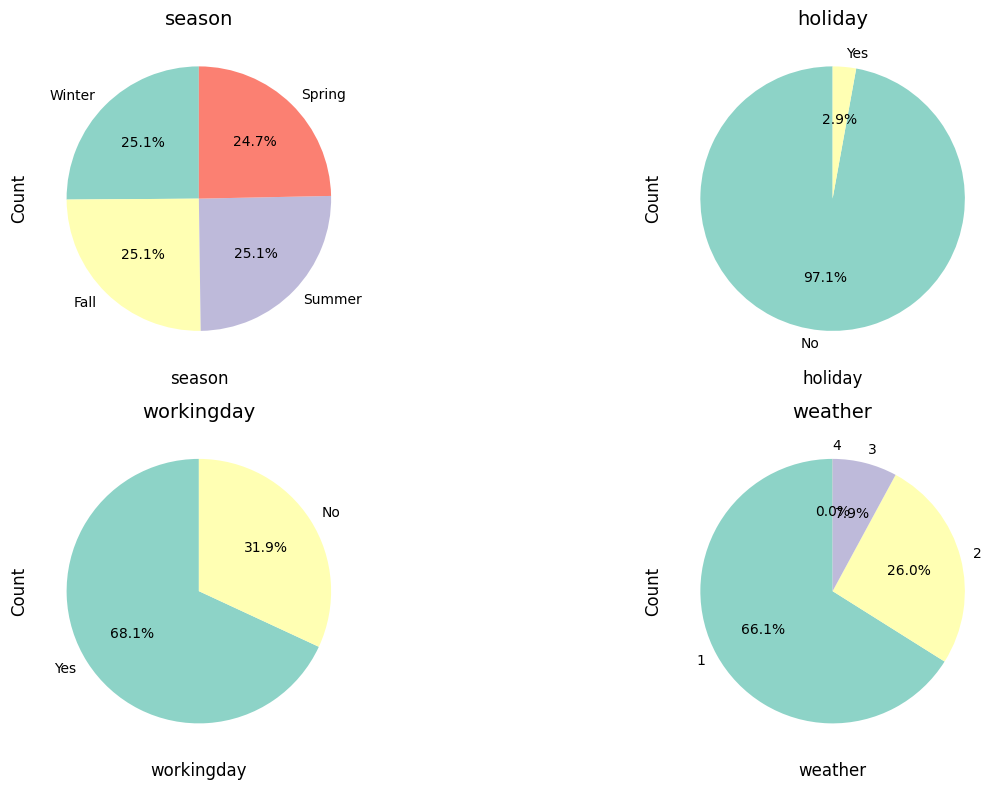

In [ ]:
# Plotting pie charts for selected categorical columns to show their percentage distribution
selected_columns = ['season', 'holiday', 'workingday', 'weather']

n = len(selected_columns)
rows = math.ceil(n / 2)
plt.figure(figsize=(15, 4 * rows))

for i, col in enumerate(selected_columns):
    plt.subplot(rows, 2, i + 1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'))
    plt.title(col, fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=30)

plt.tight_layout()
plt.show()

### Temperature (temp)

- **Boxplot & Distribution Summary**  
  - Distribution is nearly symmetric with a bell shape.  
  - Range: 0.82°C to 41°C, with mean = 20.2°C, median = 20.5°C.  
  - Skewness: 0.0037 -> Very close to normal distribution.

- **Outliers**  
  - Few extreme cold and hot values are seen, but not highly abnormal.  
  - Mild outliers detected in both tails.

- **Reason for IQR with 5%-95% Capping**  
  - Since data shows slight outliers and is almost symmetric, capping based on extreme percentiles ensures we preserve distribution shape without harsh clipping.

-  **Insight**  
  - Temp plays a vital role in ride frequency, and since the distribution is balanced, it reflects users rent bikes across seasons comfortably.

---

### Feels-like Temperature (atemp)

- **Boxplot & Distribution Summary**  
  - Similar pattern as temp, but values are slightly shifted higher.  
  - Mean = 23.6°C, Median = 24.2°C, Skewness: -0.10 -> nearly symmetric with slight left tail.

- **Outliers**  
  - Very few mild outliers observed in high temp range.  
  - Safe to cap using 5th-95th percentiles.

- **Why IQR?**  
  - Feels-like temp should align with actual temp, and outliers may represent sensor inaccuracy. Hence, percentile-based IQR caps are logical.

- **Insight**  
  - Close alignment of actual and feels-like temp supports feature consistency. Not much transformation needed.

---

### Humidity

- **Boxplot & Distribution Summary**  
  - Ranges from 0% to 100%, with mean = 62%, median = 62%.  
  - Skewness: -0.086 -> fairly symmetric.

- **Outliers**  
  - One obvious low-end outlier, likely a sensor error.  
  - No extreme high-end outliers.

- **Why IQR + 5%-95%?**  
  - Capping the lower extreme maintains integrity while not losing natural upper humidity variations.

- **Insight**  
  - Majority of the rides occur in moderately humid weather, indicating low humidity doesn't attract riders (or may be data glitch).

---

### Windspeed

- **Boxplot & Distribution Summary**  
  - Wide variation from 0 to 57 km/h.  
  - Skewness: 0.59 -> moderately right-skewed.

- **Outliers**  
  - Many high-end outliers observed.  
  - Long right tail suggests some extreme wind events.

- **IQR Justification**  
  - Instead of removing high values, we cap at 95th percentile to prevent real wind patterns being misclassified as outliers.

- **Insight**  
  - While some days are windy, majority of usage happens at low wind speeds - possibly due to rider comfort.

---

### Casual Users

- **Boxplot & Distribution Summary**  
  - Range: 0 to 367, mean = 36, median = 17.  
  - Highly right-skewed (Skewness: 2.49).

- **Outliers**  
  - Heavy tail of high casual users -> extreme variability.  
  - Clear outliers at high ends.

- **Why IQR + 5-95%?**  
  - Skewed distribution implies capping is better than trimming; IQR helps soften the extremes without data loss.

- **Insight**  
  - Casual users spike only occasionally, possibly during events or weekends, not consistent - useful in segmenting temporal campaigns.

---

### Registered Users

-  **Boxplot & Distribution Summary**  
  - Range: 0 to 886, mean = 155, median = 118.  
  - Skewness: 1.52 -> significantly right-skewed.

-  **Outliers**  
  - Significant outliers at high ends.  
  - Consistent usage pattern visible compared to casual users.

-  **Reason for 5-95% Capping**  
  - We want to retain realistic spikes (e.g. weekday rush hours) while controlling distortive impact of extremely high values.

-  **Insight**  
  - Registered users form the core base of riders. Even with outliers, they dominate ride counts. Crucial for demand prediction.

---

### Total Count

- **Boxplot & Distribution Summary**  
  - Range: 1 to 977, mean = 191, median = 145.  
  - Skewness: 1.24 -> moderately right-skewed.

- **Outliers**  
  - Several large spikes in bike usage → potentially due to seasonality, events, or promotions.

- **Why IQR + 5%-95%?**  
  - Helps in smoothing out large unpredictable peaks while retaining core usage patterns.

- **Insight**  
  - Final demand depends on combination of registered and casual trends. Slightly skewed count reflects population heterogeneity.

---

### General Reasoning for Outlier Handling (Why 5-95% IQR Capping?)

- **Preserves Distribution Shape:** Especially important in machine learning models where extreme values can mislead.  
- **Better for Skewed Data:** Avoids mean-based transformations like Z-score that may not be suitable here.  
- **Retains Data Volume:** No row deletions, just value adjustment at the tail ends.  
- **Safe for Real-World Sensor Data:** Handles potential sensor glitches without aggressive trimming.

---

### Insights

- Temperature & atemp are symmetric and show natural weather patterns.  
- Humidity is fairly balanced but needs minor correction at low end.  
- Windspeed, casual, registered, and count are right-skewed, with long tails and extreme high values - capped reasonably.  
- Registered riders dominate usage, while casual users fluctuate.  
- Outlier treatment was crucial to reduce noise and prepare for modeling.

---

# **Bivariate Analysis**

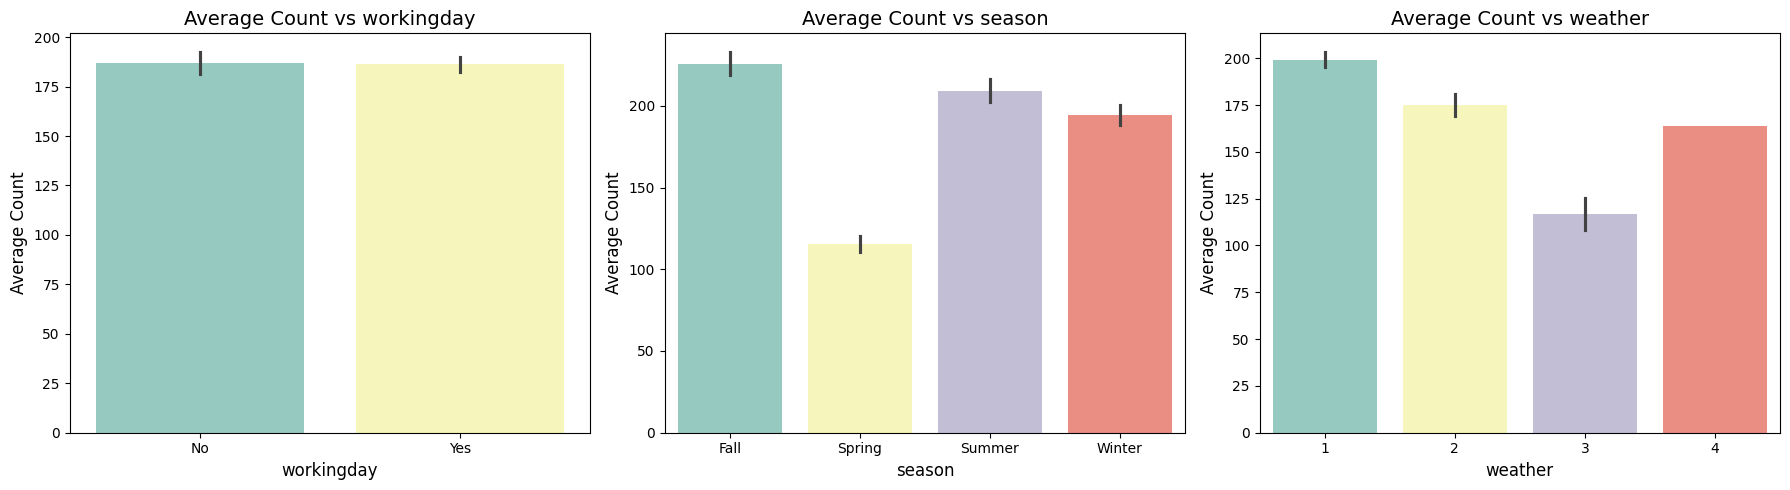

In [ ]:
# Plotting bar plots to show average bike count across different working days, seasons, and weather conditions

plt.figure(figsize=(18, 5))

for i, col in enumerate(['workingday', 'season', 'weather']):
    plt.subplot(1, 3, i + 1)
    sns.barplot(data=df, x=col, y='count', estimator='mean', palette='Set3')
    plt.title(f'Average Count vs {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Average Count', fontsize=12)

plt.tight_layout()
plt.show()

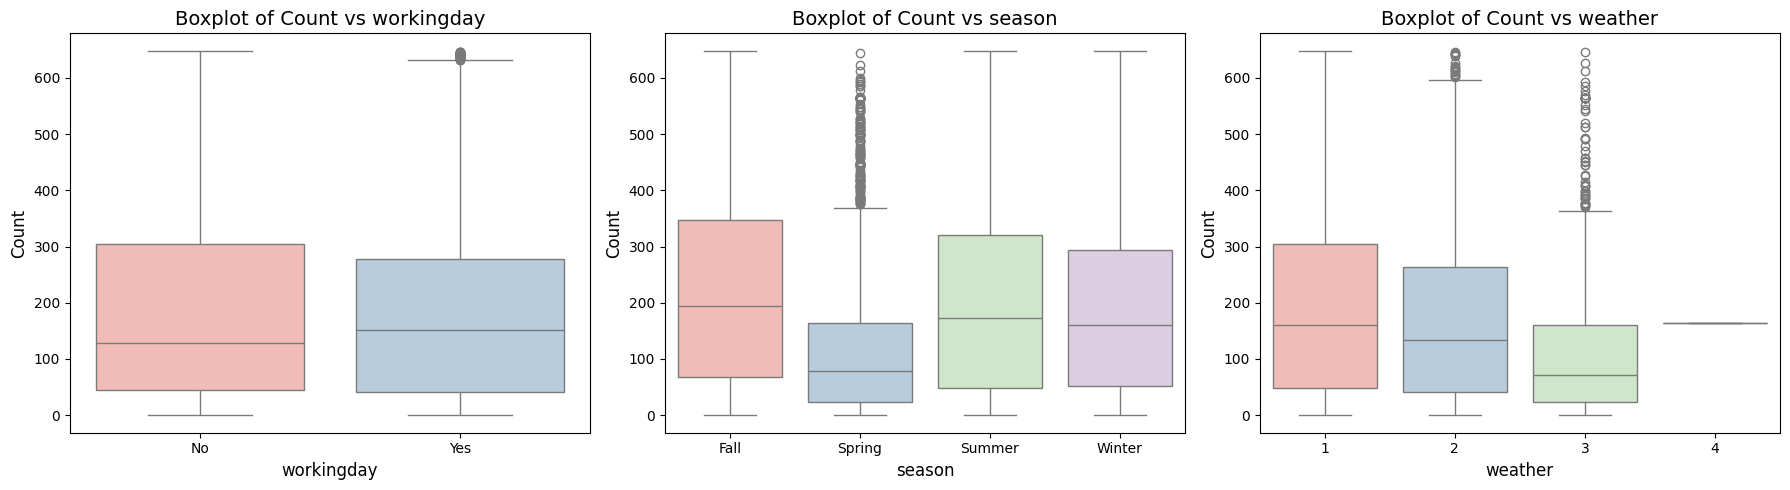

In [ ]:
# Plotting box plots to visualize the distribution and outliers of bike count across different categorical variables
plt.figure(figsize=(18, 5))

for i, col in enumerate(['workingday', 'season', 'weather']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df, x=col, y='count', palette='Pastel1')
    plt.title(f'Boxplot of Count vs {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

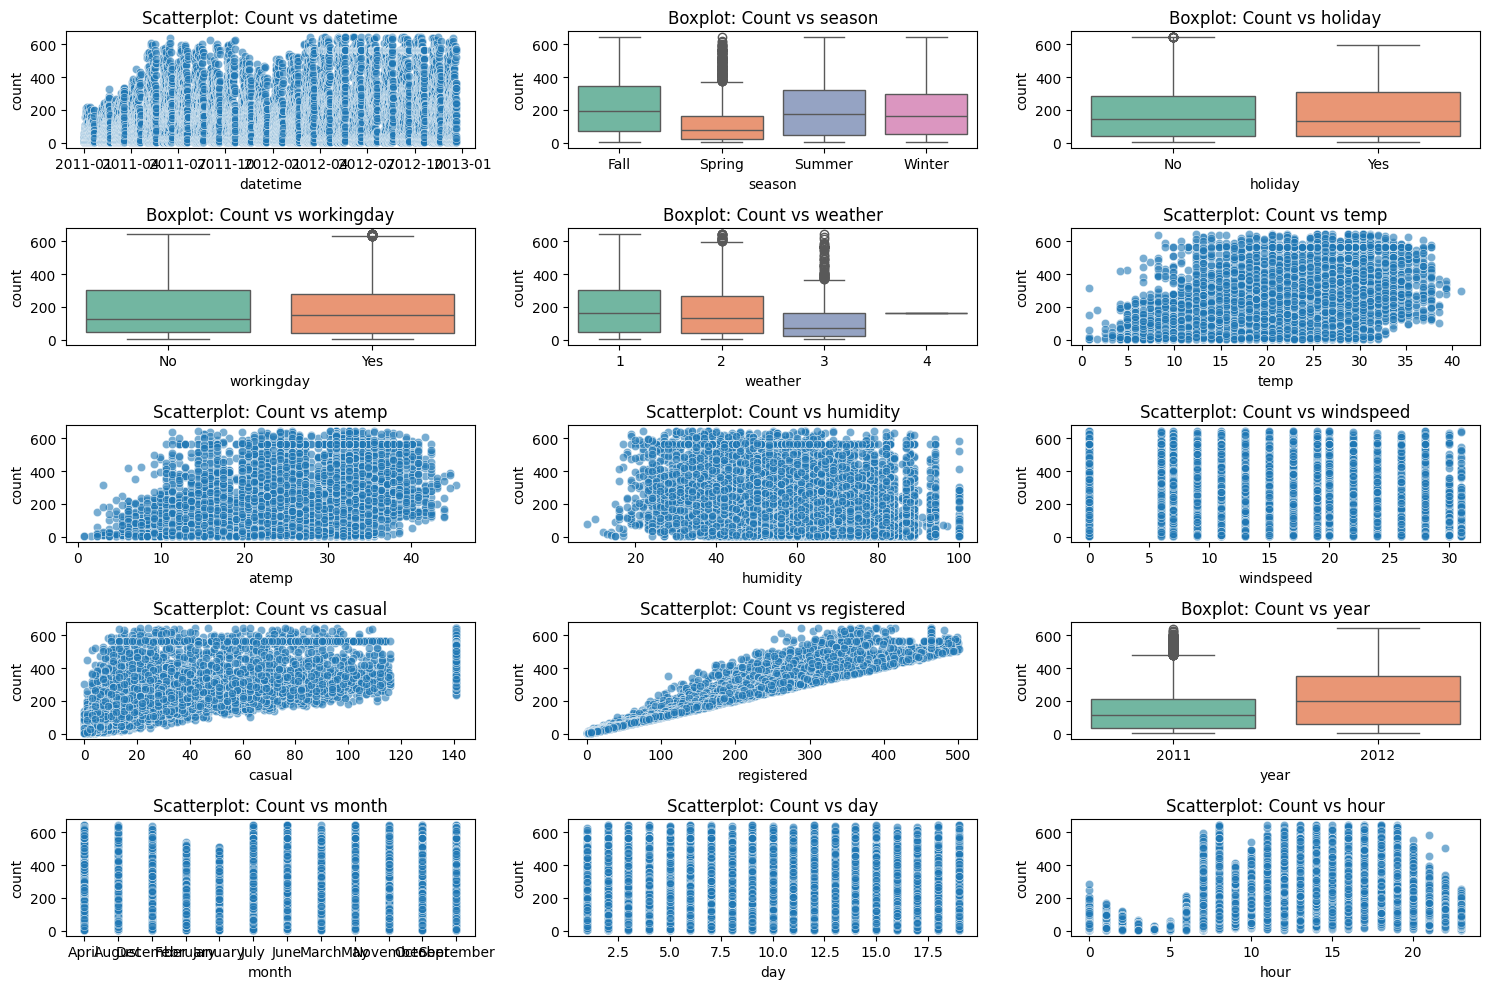

In [ ]:
# Plotting boxplots for categorical and scatterplots for numerical features against 'count' to visualize relationships
plt.figure(figsize=(15, 10))
j = 1
for col in df.columns:
    if col != 'count':

        plt.subplot(5,3,j)
        if df[col].nunique() <= 10 or df[col].dtype == 'object':
            # Categorical column
            sns.boxplot(data=df, x=col, y='count', palette='Set2')
            plt.title(f'Boxplot: Count vs {col}')
        else:
            # Numerical column
            sns.scatterplot(data=df, x=col, y='count', alpha=0.6)
            plt.title(f'Scatterplot: Count vs {col}')
        j += 1

plt.tight_layout()
plt.show()

# **Multivariate analysis**

Violin Plot by Season & Weather Combined vs Count

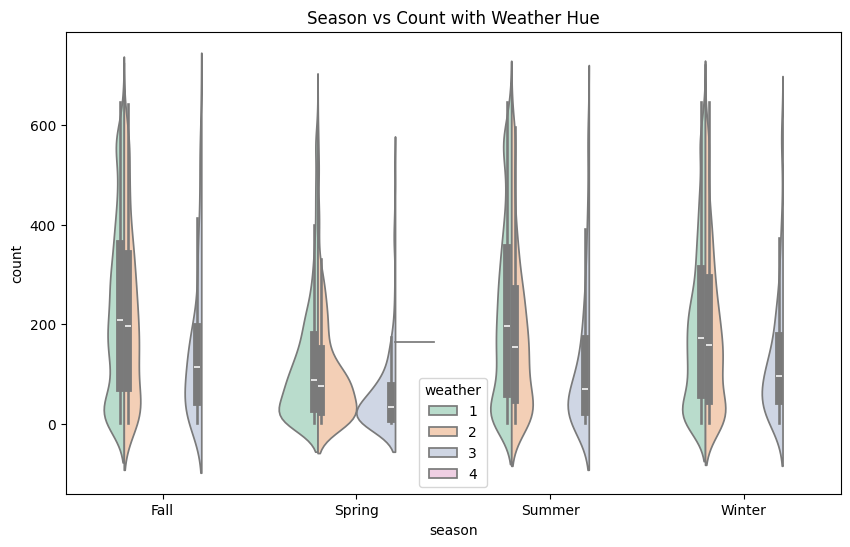

In [ ]:
# Plotting a violin plot to show the distribution of bike count across seasons with weather as hue

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='season', y='count', hue='weather', palette='Pastel2', split=True)
plt.title("Season vs Count with Weather Hue")
plt.show()

Boxplot of Working Day and Weather Combined vs Count

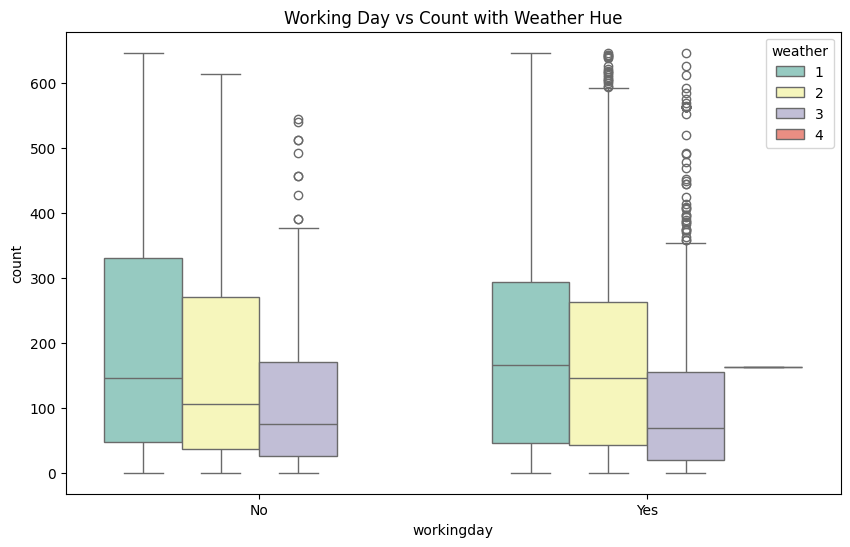

In [ ]:
# Plotting a boxplot to compare bike count across working days with weather conditions as hue

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='workingday', y='count', hue='weather', palette='Set3')
plt.title("Working Day vs Count with Weather Hue")
plt.show()

Scatter Plot: Temp vs Count Colored by Season

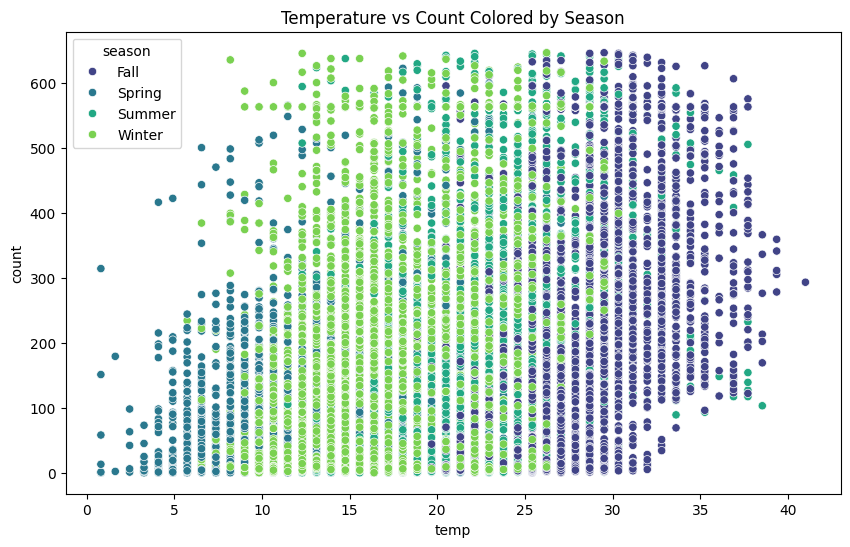

In [ ]:
# Plotting a scatter plot of temperature vs bike count, colored by season to observe seasonal trends
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='temp', y='count', hue='season', palette='viridis')
plt.title("Temperature vs Count Colored by Season")
plt.show()

Line Plot: Hourly Trend of Count by Working Day

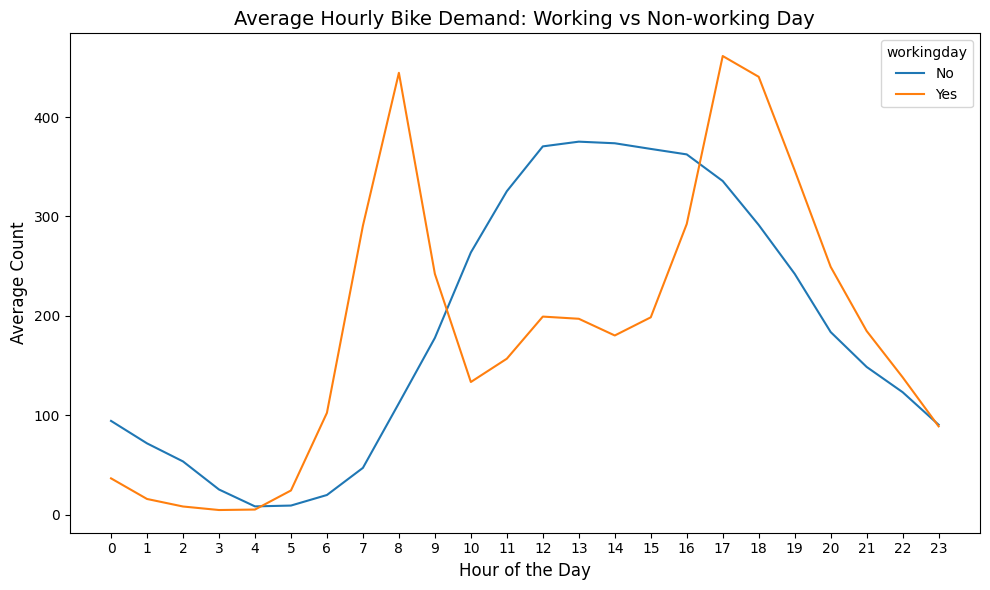

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='hour', y='count', hue='workingday', estimator='mean', ci=None, palette='tab10')
plt.title("Average Hourly Bike Demand: Working vs Non-working Day", fontsize=14)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Count", fontsize=12)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

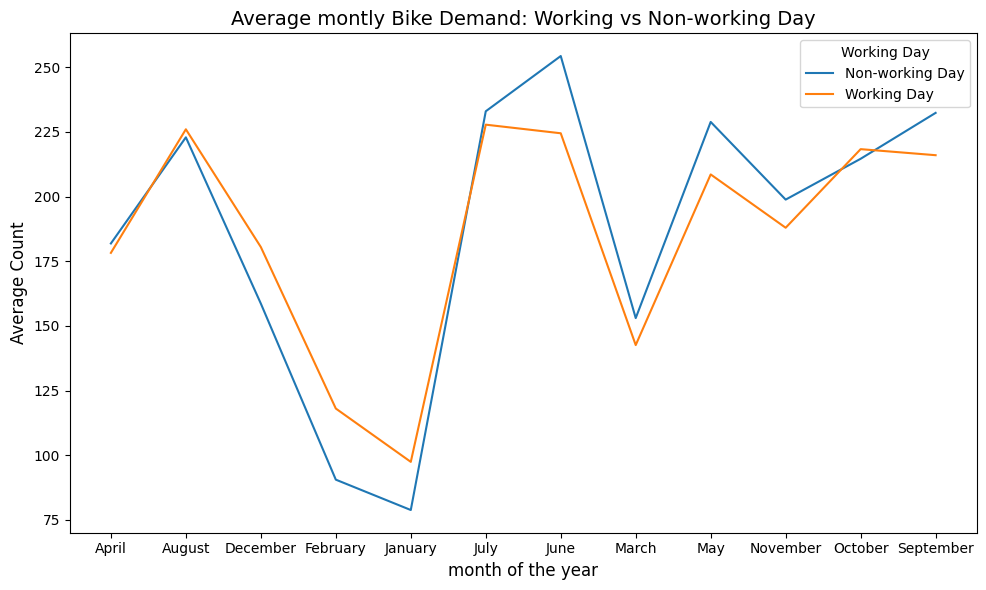

In [ ]:
# Plotting a line plot of average monthly bike demand, comparing working vs non-working days
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='month', y='count', hue='workingday', estimator='mean', ci=None, palette='tab10')
plt.title("Average montly Bike Demand: Working vs Non-working Day", fontsize=14)
plt.xlabel("month of the year", fontsize=12)
plt.ylabel("Average Count", fontsize=12)
plt.tight_layout()
plt.legend(title='Working Day', labels=['Non-working Day', 'Working Day'])
plt.show()

Heatmap

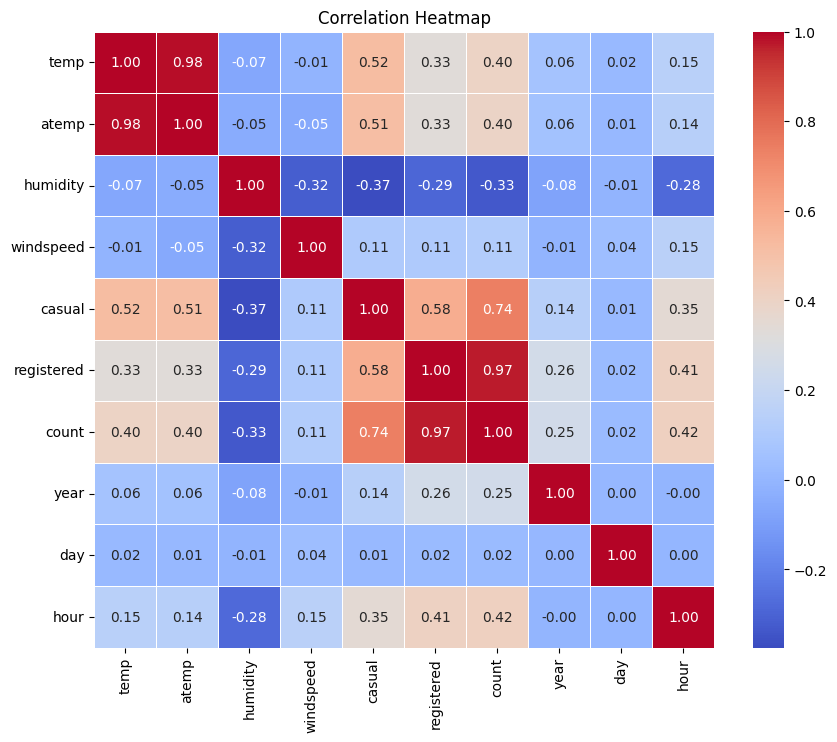

In [ ]:
# Plotting a heatmap to visualize the correlation between numerical features in the dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

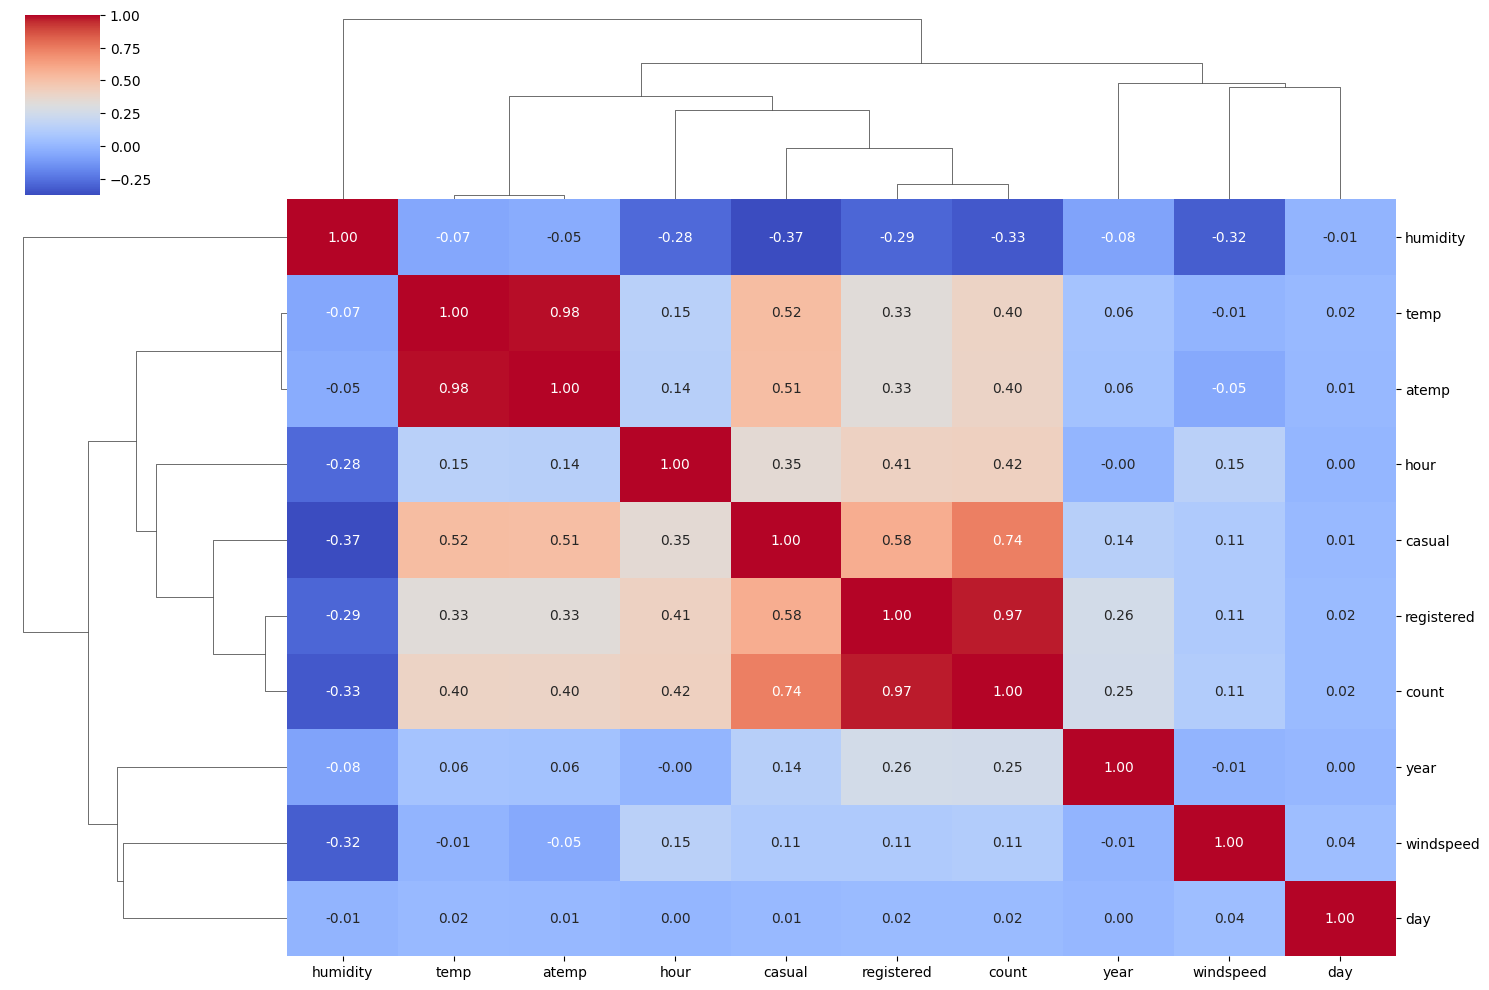

In [ ]:
# Plotting a clustermap to visualize correlations with hierarchical clustering among numerical features

sns.clustermap(df.corr(numeric_only=True), cmap='coolwarm', annot = True , fmt = '.2f' ,  figsize=(15, 10))
plt.show()

Pairplot

<Figure size 1500x1200 with 0 Axes>

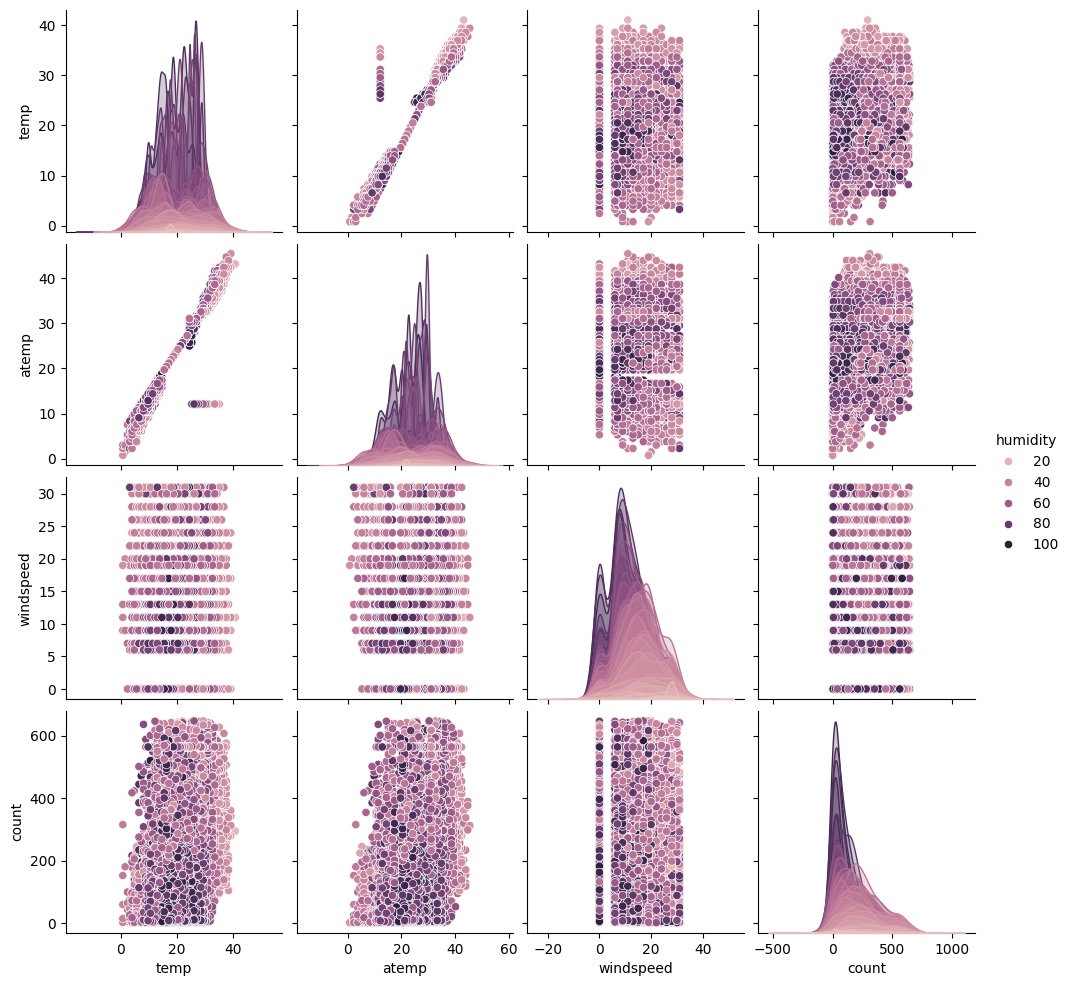

In [ ]:
# Plotting pairwise relationships between selected numerical variables with KDE diagonals and hue based on humidity

plt.figure(figsize=(15 , 12))
selected_numerics = ['temp', 'atemp', 'humidity', 'windspeed', 'count']
sns.pairplot(df[selected_numerics] , diag_kind='kde' , hue = 'humidity')
plt.show()

### R**elation Between Dependent And Independent Variables**

Instead of using count column, lets use casual & registered column to gather more insights as count = casual + registered

dependent_var= ['casual','registered'] independent_var = ['temp','atemp','humidity','working day','season','weather','month',]

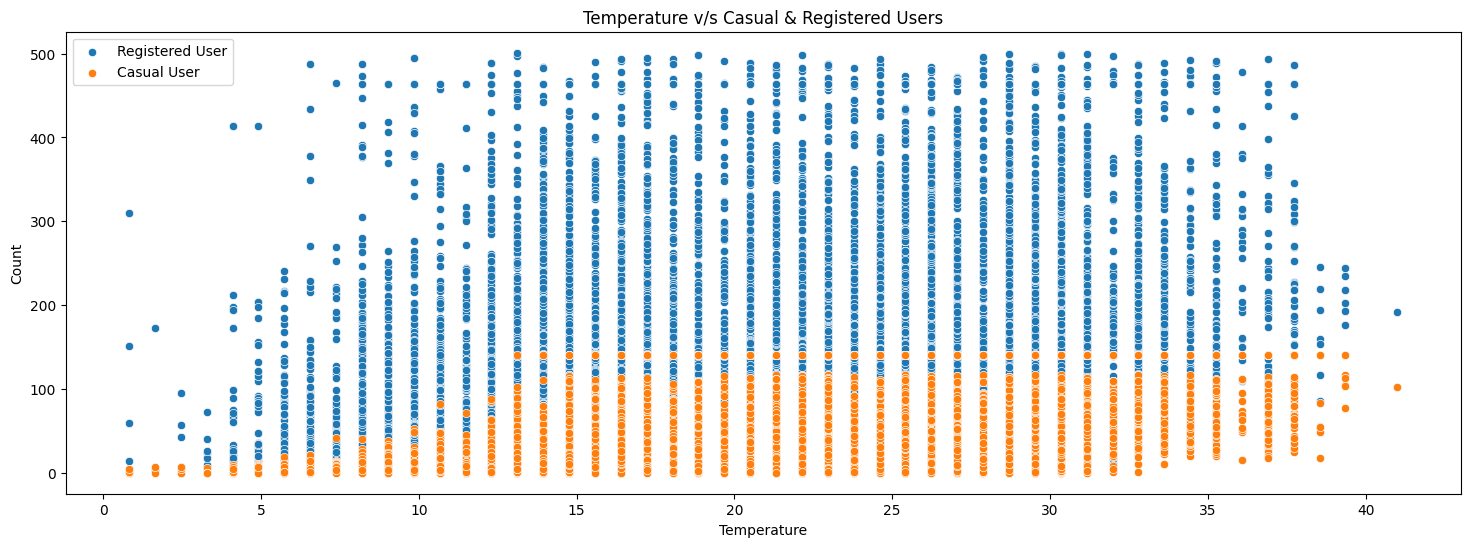

In [ ]:
# Plot visualizing difference between casual user and registered user wrt to Temperature
plt.figure(figsize=(18, 6))

sns.scatterplot(x ="temp",y = "registered",data = df,label = "Registered User")
sns.scatterplot(x="temp", y="casual", data=df,label = "Casual User")

plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature v/s Casual & Registered Users')
plt.legend()
plt.show()

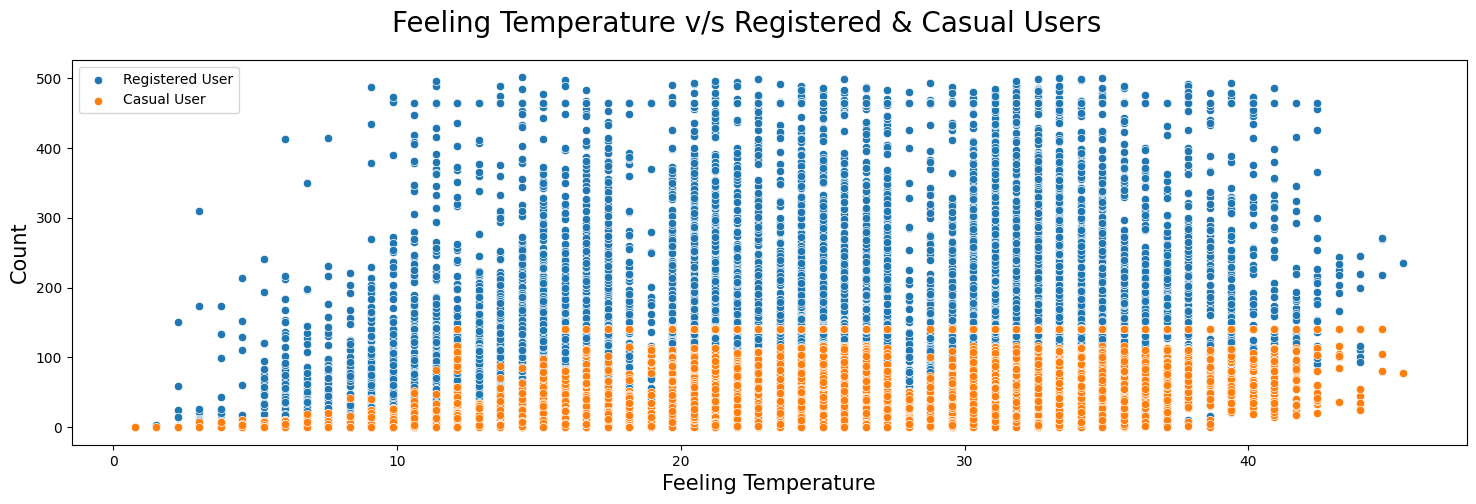

In [ ]:
# Plotting scatter plots to compare how feeling temperature affects registered and casual user counts

plt.figure(figsize = (18,5))

sns.scatterplot(x = "atemp",y = "registered",data = df,label ="Registered User")
sns.scatterplot(x = "atemp",y = "casual",data = df,label = "Casual User")
plt.suptitle("Feeling Temperature v/s Registered & Casual Users",fontsize = 20)
plt.xlabel("Feeling Temperature",fontsize= 15)
plt.ylabel("Count",fontsize= 15)
plt.show()

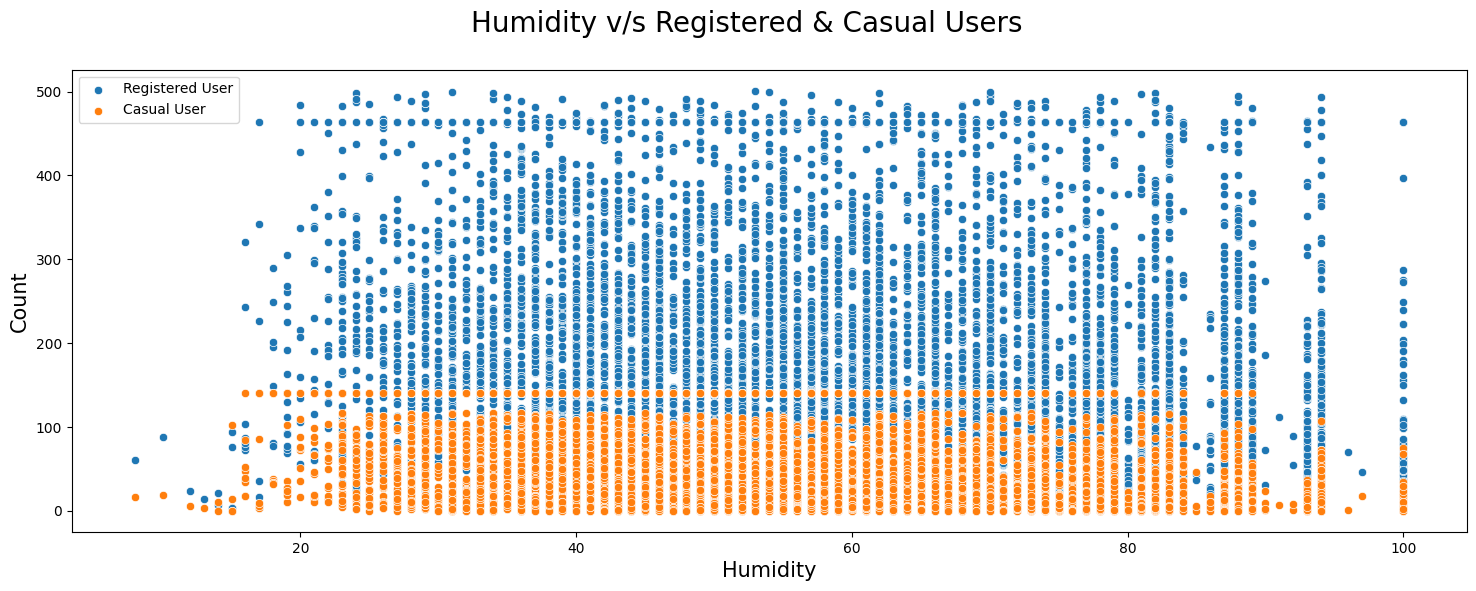

In [ ]:
# Plotting scatter plots to show the relationship between humidity and registered/casual user counts

plt.figure(figsize = (18,6))
sns.scatterplot(x = "humidity",y = "registered",data =df,label = "Registered User")
sns.scatterplot(x = "humidity",y = "casual",data = df,label = "Casual User")
plt.suptitle("Humidity v/s Registered & Casual Users",fontsize = 20)
plt.xlabel("Humidity",fontsize= 15)
plt.ylabel("Count",fontsize= 15)
plt.show()

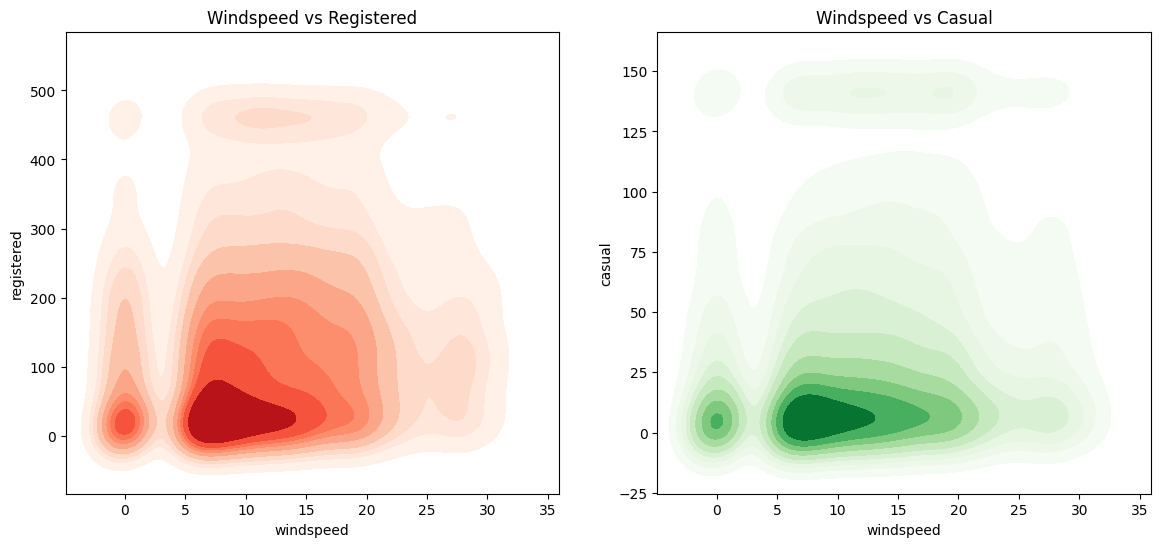

In [ ]:
# Plotting 2D KDE plots to show density of windspeed vs registered and casual users

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.kdeplot(data=df, x="windspeed", y="registered", fill=True, cmap='Reds', ax=axes[0])
sns.kdeplot(data=df, x="windspeed", y="casual", fill=True, cmap='Greens', ax=axes[1])

axes[0].set_title("Windspeed vs Registered")
axes[1].set_title("Windspeed vs Casual")

plt.show()

### **Humidity v/s Registered & Casual Users**

**Summary:** This scatter plot shows how the number of registered and casual users (and thus total bike count) changes with varying humidity levels. Registered users are represented by blue dots, and casual users by orange dots.

**Insights:**
* **No Strong Linear Trend:** There isn't a clear increasing or decreasing pattern for bike rentals as humidity changes. Demand seems to be present across a wide range of humidity levels.
* **Peak Demand at Moderate Humidity:** While not a sharp peak, the highest counts for both registered and casual users appear to be concentrated in the mid-range of humidity (around 30-70%).
* **Drop at Extreme Humidity:** At very low (below 20%) and very high (above 80-90%) humidity levels, the total number of rentals, especially casual users, appears to decrease significantly. Extremely high humidity might make it uncomfortable to ride.
* **Registered vs. Casual:** Registered users consistently outnumber casual users across almost all humidity levels, indicating a more stable base of users regardless of humidity. Casual users appear more sensitive to extreme humidity.

### **Correlation Heatmap**

**Summary:** This heatmap displays the correlation coefficients between various numerical variables in the dataset. Values close to 1 or -1 indicate a strong positive or negative linear relationship, respectively, while values close to 0 indicate a weak or no linear relationship.

**Insights:**
* **Temperature's Strong Influence:** Both temp and atemp (feeling temperature) are highly positively correlated with casual users (around 0.52/0.51) and count (around 0.40). This confirms that warmer temperatures generally lead to higher bike demand, especially from casual users. temp and atemp are, as expected, almost perfectly correlated (0.98), meaning they convey very similar information.
* **Humidity's Negative Impact:** humidity shows a negative correlation with casual (-0.37), registered (-0.29), and count (-0.33). This indicates that as humidity increases, bike rentals tend to decrease, especially among casual users.
* **Windspeed's Weak Impact:** windspeed has a very weak correlation with casual (0.11), registered (0.11), and count (0.11), suggesting it's not a strong linear predictor of overall bike demand.
* **User Type Contribution:** registered users have a very strong positive correlation with count (0.97), and casual users also have a strong positive correlation with count (0.74). This is expected, as count is the sum of casual and registered. It highlights that both user segments contribute significantly to total demand, with registered users being the primary driver.
* **Hourly and Yearly Trends:** hour shows a moderate positive correlation with all user counts (0.35-0.42), indicating that certain hours of the day have higher demand. year has a weak correlation (0.14-0.26) with user counts, possibly suggesting a slight increase in demand over the years the data covers, but not a dominant trend. day has almost no linear correlation.

### **Average Monthly Bike Demand: Working vs Non-working Day**

**Summary:** This line plot compares the average monthly bike demand for working days versus non-working days (weekends and holidays).

**Insights:**
* **Overall Fluctuations:** Bike demand fluctuates significantly throughout the year for both working and non-working days.
* **Working Day Peaks:** Working days generally show higher average demand than non-working days during peak months like April, August, June, and September. This might reflect daily commuting patterns.
* **Non-working Day Resilience:** In some months (e.g., February, November, December, January), non-working day demand is either comparable to or even slightly higher than working day demand, suggesting that people still use bikes for leisure or other activities on off-days, especially in months with potentially more favorable weather for leisure rides.
* **Seasonal Influence:** The distinct peaks and troughs strongly suggest a seasonal pattern in bike demand, regardless of whether it's a working day or not. Demand generally dips in winter months (January, February, December) and peaks in warmer months.

### **Various Scatterplots and Boxplots of Count**

**Summary:** This image is a compilation of multiple plots showing the relationship between `count` (total rentals) and other variables like `datetime`, `season`, `holiday`, `workingday`, `weather`, `temp`, `atemp`, `humidity`, `windspeed`, `casual`, `registered`, `year`, `month`, `day`, and `hour`.

**Insights (confirming and expanding on previous points):**
* **Datetime Trend:** The scatterplot for `datetime` shows a general upward trend in total rentals over time, suggesting Yulu's user base might be growing or adoption increasing.
* **Season's Impact (Boxplot):** Confirming the ANOVA findings, `Fall` shows the highest median count, followed by `Summer`. `Spring` and `Winter` have lower median counts and potentially wider distributions, especially Spring. This clearly indicates `season` is a major factor.
* **Holiday vs. Non-Holiday (Boxplot):** The median count for non-holidays (`No`) appears slightly higher than for holidays (`Yes`), though both have a wide range. This supports the idea that working days (which are generally non-holidays) have higher demand.
* **Workingday Impact (Boxplot):** The median count for `workingday` (Yes) is visibly higher than for `non-workingday` (No), corroborating the t-test results and the monthly demand plot.
* **Weather's Strong Influence (Boxplot):** `Weather` condition 1 (Clear) has the highest median demand, significantly dropping for condition 2 (Mist), further for condition 3 (Light Rain/Snow), and almost non-existent for condition 4 (Heavy Rain/Snow). This highlights weather as a critical determinant.
* **Temperature's Positive Trend (Scatterplot):** As `temp` and `atemp` increase, the `count` generally increases, reaching peak demand around 20-30°C.
* **Humidity Scatter:** Confirms the scattered nature with no clear linear trend, though very high humidity (above 90%) seems to limit maximum counts.
* **Windspeed Scatter:** Shows demand across various windspeeds, but very high windspeeds (above 20-25) appear to restrict higher counts. Many data points at 0 windspeed suggest calm conditions don't necessarily guarantee high demand.
* **Strong Correlation with Users:** `casual` and `registered` users both show a clear positive relationship with `count`, as expected.
* **Hourly Peaks:** The `hour` scatterplot shows clear peaks in demand during morning and evening rush hours (around 8 AM and 5-6 PM), indicating significant commuter usage.
* **Month and Day:** `month` shows distinct seasonal patterns, while `day` of the month shows no clear pattern, meaning the demand isn't strongly influenced by whether it's the beginning, middle, or end of the month. `year` shows overall growth.

### **Boxplot of Count vs Workingday, Season, Weather**

**Summary:** This image provides larger, clearer boxplots for `Count` against `workingday`, `season`, and `weather`.

**Insights (reinforcing previous observations with better clarity):**
* **Workingday Clarity:** The median count for working days (`Yes`) is clearly above that for non-working days (`No`), and the interquartile range (IQR) for working days also appears larger, indicating more variability in demand on working days.
* **Season Clarity:** Fall (`3`) stands out as having the highest median count and a wide distribution, suggesting high and variable demand. Summer (`2`) is next. Spring (`1`) and Winter (`4`) clearly have lower median demands. Outliers are more prominent in the peak seasons.
* **Weather Clarity:** The drop in median count from `weather` 1 (Clear) to `weather` 2 (Mist) to `weather` 3 (Light Rain/Snow) is very distinct. `Weather` 4 (Heavy Rain/Snow) shows extremely low counts and minimal variability, highlighting its severe negative impact. This confirms weather as a dominant factor.

### **Average Hourly Bike Demand: Working vs Non-working Day**

**Summary:** This line plot compares the average hourly bike demand for working days versus non-working days across a 24-hour cycle.

**Insights:**
* **Commuter Peaks (Working Day):** Working days exhibit classic commute patterns with two distinct peaks: one in the morning (around 8-9 AM) and a much larger peak in the evening (around 5-6 PM). This strongly suggests a significant portion of Yulu's usage on working days is for commuting.
* **Leisure/Evening Peak (Non-working Day):** On non-working days, the morning peak is much lower or non-existent. Instead, there's a broader, more sustained demand throughout the afternoon, peaking in the early evening (around 2-3 PM), which might indicate leisure riding, errands, or social activities.
* **Overnight Lows:** Both types of days show very low demand during late-night and early morning hours (0-5 AM).

### **Average Count vs Workingday, Season, Weather**

**Summary:** These bar plots show the average total bike count for different categories of `workingday`, `season`, and `weather`, along with error bars.

**Insights (quantifying previous visual observations):**
* **Workingday Average:** The average count for working days is slightly higher than non-working days, though the difference is not as dramatic as the peaks seen in hourly demand. This further supports the statistically significant difference found in the t-test.
* **Season Average:** Quantifies the strong seasonal effect:
    * Fall (Season 3) has the highest average demand (around 220-230).
    * Summer (Season 2) is next (around 200-210).
    * Winter (Season 4) has a lower average (around 190).
    * Spring (Season 1) has the lowest average demand (around 110-120).
* **Weather Average:** Clearly shows the impact of weather:
    * Weather 1 (Clear) has by far the highest average demand (around 200).
    * Weather 2 (Mist) is next (around 170-180).
    * Weather 3 (Light Rain/Snow) sees a significant drop (around 110).
    * Weather 4 (Heavy Rain/Snow) has extremely low average demand (around 10-20), confirming its severely detrimental effect.

### **Temperature v/s Casual & Registered Users**

**Summary:** This scatter plot illustrates the relationship between temperature and the count of registered and casual users.

**Insights:**
* **Temperature-Dependent Demand:** Both registered and casual user counts generally increase as temperature rises, particularly between 10°C and 30°C.
* **Optimal Temperature Range:** The highest number of rentals for both user types appears to occur within a comfortable temperature range (roughly 20°C to 30°C).
* **Drop at Extremes:** Demand drops significantly at very low temperatures (below 10°C) and also appears to slightly decrease at very high temperatures (above 35°C), which might be due to discomfort.
* **Casual Users More Sensitive:** Casual users appear slightly more sensitive to temperature extremes; their numbers drop more sharply at very low and very high temperatures compared to registered users, who maintain a relatively higher base level of usage.
* **Registered User Dominance:** Registered users consistently form the larger portion of the total count across all temperature ranges, reinforcing their role as the primary demand drivers.

---

# **Check if there any significant difference between the no. of bike rides on Weekdays and Weekends?**

Since we have two independent saples, we can go with Two Sample Independent T-Test.

Assumptions of Two Sample Independent T-Test :

The data should be normall distributed

variances of the two groups are equal


Let the Confidence interval be 95%, so siginificance (alpha) is 0.05

Checking Normality Of Data

(a) Wilkin-ShapiroTest

The test hypothesis for the Wilkin-Shapiro test are:

Ho: Data is normally distributed

Ha: Data is not normally distributed.

In [ ]:
t_stat,p_val=shapiro(df['count'])

p_val

np.float64(6.300353068536678e-65)

Hence the p_values is lesser than the significance level, Null hypothesis can be rejected.

Therefore, the Data is not normally distributed.

(b) QQ Plott Analysis

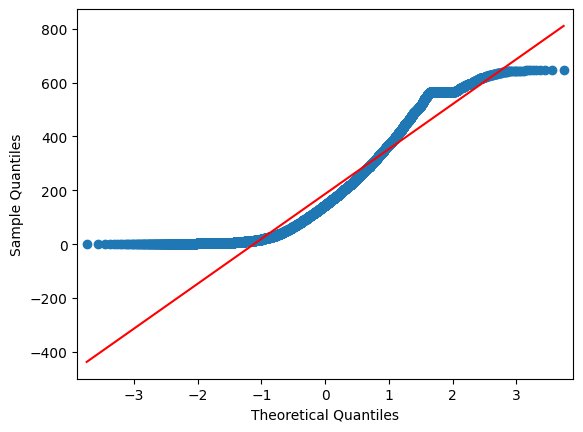

In [ ]:
qqplot(df['count'], line = 's')
plt.show()

Checking Variance of 2 Groups Using Levene's Test

**The Test hypotheses for Levene's test are:**

**Ho: The variances are equal.**

**Ha: The variances are not equal.**

In [ ]:
workingdays = df[df['workingday'] == 'Yes']['count']
holidays = df[df['workingday'] == 'No']['count']

lstat , pval = levene(workingdays, holidays)

if pval > 0.05:
  print('We failed to reject null hypothesis\n')
  print('The variances are equal')
else:
  print('We rejected null hypothesis\n')
  print('The variances are not equal')

We rejected null hypothesis

The variances are not equal


<Axes: xlabel='count', ylabel='Density'>

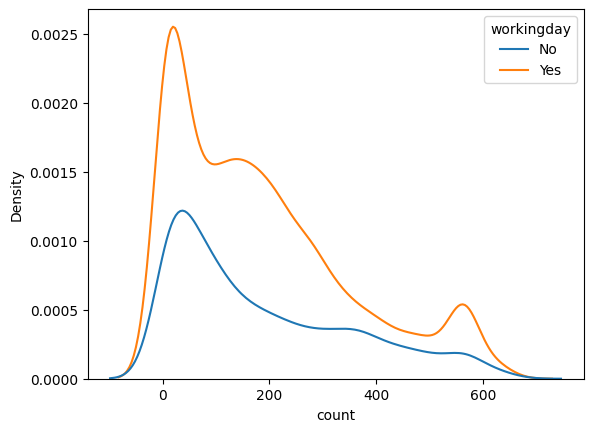

In [ ]:
sns.kdeplot(data = df, x = 'count', hue = 'workingday')

here variances are unequal. So we need to use Welch's t-test (equal_var=False).

Two Sample Independent T-Test


**The hypothesis for the t-test are:**

**Ho: There is no significant difference of mean count between working and non-working days.**

**Ha: There is a significant difference of mean count between working and non-working days.**

In [ ]:
tstat , pval = ttest_ind(workingdays , holidays , equal_var = False)

if pval > 0.05:
  print('We failed to reject null hypothesis\n')
  print('There is no significant difference of mean count between working and non-working days.')
else:
  print('We rejected null hypothesis\n')
  print('There is a significant difference of mean count between working and non-working days.')

We failed to reject null hypothesis

There is no significant difference of mean count between working and non-working days.


Kruskal-Wallis Test (Lets test using this too)
**The hypothesis for the K-W Test are:**

**Ho: There is no significant difference of Median count between working and non-working days.**

**Ha: There is a significant difference of Median count between working and non-working days.**

In [ ]:
kstats , pval = kruskal(workingdays , holidays)

if pval > 0.05:
  print('We failed to reject null hypothesis\n')
  print('There is no significant difference of mean count between working and non-working days.')
else:
  print('We rejected null hypothesis\n')
  print('There is a significant difference of mean count between working and non-working days.')

We failed to reject null hypothesis

There is no significant difference of mean count between working and non-working days.


**Summary: Weekday vs Weekend Bike Ride Analysis**

To determine if there's a significant difference in the number of bike rides between weekdays and weekends, we conducted a series of statistical tests. A Shapiro-Wilk test confirmed that the count variable is not normally distributed (p-value = 6.3e-65). Since the assumption of normality is violated and Levene's test indicated unequal variances between the groups (p-value < 0.05), we applied Welch's t-test, which is robust to unequal variances. The result showed no significant difference in the mean ride counts between working and non-working days (p-value > 0.05). To validate further, a non-parametric Kruskal-Wallis test was also performed, which again failed to reject the null hypothesis. Thus, we conclude that there is no statistically significant difference in the number of bike rides between weekdays and weekends based on the available data.

# **Check if the demand of bicycles on rent is the same for different Weather conditions?**

Since we have more than two categories now, so will use ANOVA here.

Assumptions for ANOVA are:

The population data should be normally distributed- The data is not normal as verified by Wilkin-Shapiro test and the qqplot.


The data points must be independent- This condition is satisfied.


Approximately equal variance within groups- This will be verified using Levene's test.

In [ ]:
df.groupby('weather')['count'].skew()

weather
1    0.780271
2    0.962029
3    1.740640
4         NaN
Name: count, dtype: float64

In [ ]:
# kurtosis test of weather

df.groupby('weather')['count'].apply(lambda x: x.kurtosis())

weather
1   -0.391734
2    0.135578
3    2.899994
4         NaN
Name: count, dtype: float64

<Axes: xlabel='count', ylabel='Density'>

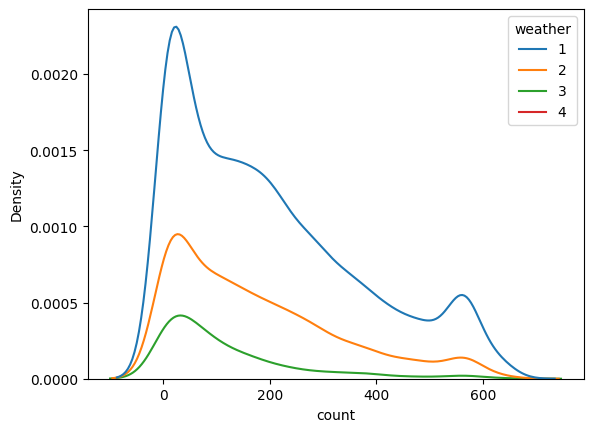

In [ ]:
sns.kdeplot(data = df, x = 'count', hue = 'weather')

<Axes: xlabel='count', ylabel='Count'>

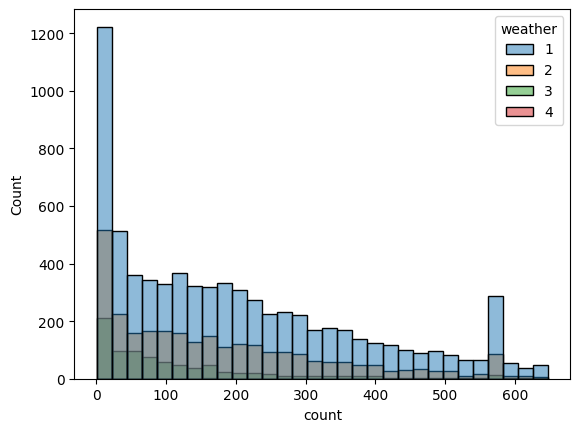

In [ ]:
sns.histplot(data = df, x = 'count', hue = 'weather')

Checking Variance of between Groups Using Levene's Test

**The Test hypothesis for Levene's test are:**

**Ho: The variance bewteen all groups is equal.**

**Ha: The variances between atleast 2 groups is not equal.**

In [ ]:
weather1 = df[df['weather'] == 1]['count']
weather2 = df[df['weather'] == 2]['count']
weather3 = df[df['weather'] == 3]['count']
weather4 = df[df['weather'] == 4]['count']

lstat, pval = levene(weather1, weather2, weather3,weather4)

if pval < 0.05:
  print('We reject null hypothesis\n')
  print('The variances between atleast 2 groups are not equal')

else:
    print('We failed to reject null hypothesis\n')
    print('The variances between all groups are equal')

We reject null hypothesis

The variances between atleast 2 groups are not equal


Two of the three conditions of ANOVA are not met, We will still perform ANOVA.

Then We will also perform Kruskal's test and compare the results.

In case of any discrepancies, Kruskal's test results will be considered, since data does not met conditions of ANOVA.

One Way ANOVA Test

**The hypothesis for ANOVA are:**

**Ho: There is no significant difference between demand of bicycles for different Weather conditions.**

**Ha: There is a significant difference in demand of bicycles atleast between 2 different Weather conditions.**

In [ ]:
astat, pval = f_oneway(weather1, weather2, weather3,weather4)

if pval > 0.05:
  print('We failed to reject null hypothesis\n')
  print('There is no significant difference between demand of bicycles for different Weather conditions.')
else:
  print('We rejected null hypothesis\n')
  print('There is a significant difference in demand of bicycles atleast between 2 different Weather conditions.')

We rejected null hypothesis

There is a significant difference in demand of bicycles atleast between 2 different Weather conditions.


Kruskal-Wallis Test on Weather

**The hypothesis for the K-W Test are:**

**Ho: There is no significant difference of Median count between all type of weather.**

**Ha: There is a significant difference of Median count between atleast 2 type of weather**

In [ ]:
kstat , pval = kruskal(weather1 , weather2 , weather3 , weather4)

if pval > 0.05:
  print('We failed to reject null hypothesis\n')
  print('There is no significant difference between demand of bicycles for different Weather conditions.')
else:
  print('We rejected null hypothesis\n')
  print('There is a significant difference in demand of bicycles atleast between 2 different Weather conditions.')

We rejected null hypothesis

There is a significant difference in demand of bicycles atleast between 2 different Weather conditions.


**Summary: Demand Variation Across Weather Conditions**

To examine whether the demand for bicycles differs across various weather conditions, we applied statistical testing. The count variable is already known to be non-normally distributed (as confirmed by Shapiro-Wilk and QQ plot analysis). The Levene's test for equality of variances across weather groups resulted in a p-value < 0.05, indicating unequal variances across weather categories. Despite the violation of ANOVA assumptions (normality and equal variances), a One-Way ANOVA was conducted and yielded a statistically significant result (p-value < 0.05), suggesting differences in bicycle demand across at least two weather categories.

To validate this, we also used the Kruskal-Wallis test, which is a non-parametric alternative suitable for skewed data and unequal variances. The test also led to rejection of the null hypothesis, confirming that weather conditions significantly affect rental demand. Thus, even with assumption violations, both ANOVA and Kruskal's test consistently show that weather has a meaningful impact on the number of rented bicycles.

# **Check if the demand of bicycles on rent is the same for different Seasons?**

Here also we have more than two categories now, so will use ANOVA here.

Assumptions for ANOVA are:

The population data should be normally distributed- The data is not normal as verified by Wilkin-Shapiro test and the qqplot.


The data points must be independent- This condition is satisfied.


Approximately equal variance within groups- This will be verified using Levene's test.

In [ ]:
# skewness of seasons

df.groupby('season')['count'].skew()

season
Fall      0.535258
Spring    1.683187
Summer    0.713735
Winter    0.801766
Name: count, dtype: float64

In [ ]:
# kurtosis test of seasons

df.groupby('weather')['count'].apply(lambda x: x.kurtosis())

weather
1   -0.391734
2    0.135578
3    2.899994
4         NaN
Name: count, dtype: float64

<Axes: xlabel='count', ylabel='Density'>

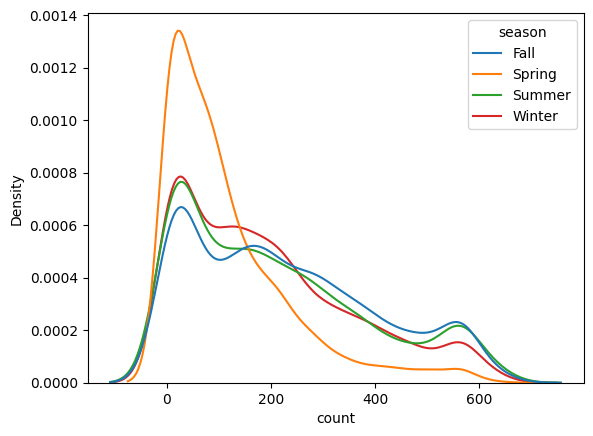

In [ ]:
sns.kdeplot(data = df, x = 'count', hue = 'season')

<Axes: xlabel='count', ylabel='Count'>

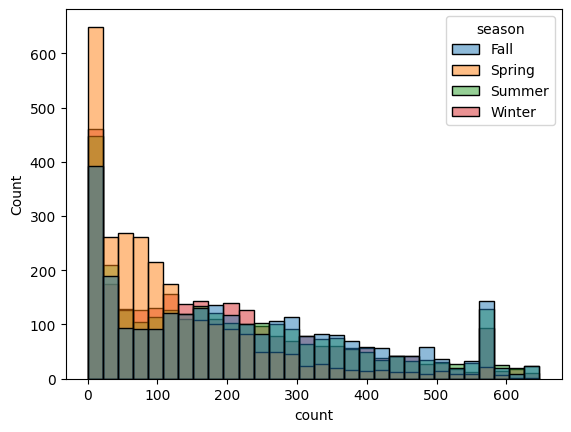

In [ ]:
sns.histplot(data = df, x = 'count', hue = 'season')

Checking Variance of between Groups Using Levene's Test

**The Test hypothesis for Levene's test are:**

**Ho: The variance bewteen all groups is equal.**

**Ha: The variances between atleast 2 groups is not equal.**

In [ ]:
df.season.unique()

['Spring', 'Summer', 'Fall', 'Winter']
Categories (4, object): ['Fall', 'Spring', 'Summer', 'Winter']

In [ ]:
spring = df[df['season'] == 'spring']['count']
summer = df[df['season'] == 'summer']['count']
fall = df[df['season'] == 'fall']['count']
winter = df[df['season'] == 'winter']['count']

lstat, pval = levene(spring,summer,fall,winter)

if pval < 0.05:
  print('We reject null hypothesis\n')
  print('The variances between atleast 2 groups are not equal')

else:
    print('We failed to reject null hypothesis\n')
    print('The variances between all groups are equal')

We failed to reject null hypothesis

The variances between all groups are equal


One Way ANOVA Test

**The hypothesis for ANOVA are:**

**Ho: There is no significant difference between demand of bicycles for different Seasons.**

**Ha: There is a significant difference in demand of bicycles atleast between 2 different Seasons.**

In [ ]:
astat, pval = f_oneway(spring,summer,fall,winter)

if pval > 0.05:
  print('We failed to reject null hypothesis\n')
  print('There is no significant difference between demand of bicycles for different Seasons.')
else:
  print('We rejected null hypothesis\n')
  print('There is a significant difference in demand of bicycles atleast between 2 different Seasons.')

We rejected null hypothesis

There is a significant difference in demand of bicycles atleast between 2 different Seasons.


Kruskal-Wallis Test

**The hypothesis for the K-W Test are:**

**Ho: There is no significant difference of Median count between all type of seasons.**

**Ha: There is a significant difference of Median count between atleast 2 type of seasons**

In [ ]:
kstat, pval = kruskal(spring ,summer, fall, winter)

if pval > 0.05:
  print('We failed to reject null hypothesis\n')
  print('There is no significant difference between demand of bicycles for different Seasons.')
else:
  print('We rejected null hypothesis\n')
  print('There is a significant difference in demand of bicycles atleast between 2 different Seasons.')

We rejected null hypothesis

There is a significant difference in demand of bicycles atleast between 2 different Seasons.


**Summary: Demand Variation Across Seasons**

- To analyze whether the demand for bicycles varies across different seasons, we conducted a series of statistical tests. The count of rentals (count) was found to be non-normally distributed in all four seasons, with right skewness being most prominent in Spring (1.68), followed by Winter, Summer, and Fall. The kernel density and histogram plots further confirmed this skewed nature.

- We then applied Levene's Test to check for equality of variances among seasons. The result showed a p-value > 0.05, indicating that variances across seasonal groups are equal, and thus, ANOVA's assumption of homogeneity of variance holds.

- Following this, we performed a One-Way ANOVA, which yielded a statistically significant result (p < 0.05), leading us to reject the null hypothesis. This implies that at least one season differs significantly in terms of average rental demand.

- To confirm this result - especially because of the skewed data - we applied the Kruskal-Wallis test, a non-parametric alternative to ANOVA. It also confirmed significant seasonal variation in bicycle rental demand.

- Both ANOVA and Kruskal-Wallis results agree - there is a statistically significant difference in bicycle rental demand across different seasons, with Spring and Winter likely contributing to the variation.

# **Check if the Weather conditions are significantly different during different Seasons?**

Chi-square Test OF Independence for Weather Conditions and Seasons¶

**The hypothesis for the chi-square test are:**

**Ho: Season and Weather are independent of each other.**

**Ha: Season and Weather are dependent on each other.**

In [ ]:
table = pd.crosstab(df['weather'], df['season'])

table

season   Fall  Spring  Summer  Winter
weather                              
1        1930    1759    1801    1702
2         604     715     708     807
3         199     211     224     225
4           0       1       0       0

In [ ]:
cstat , pval , dof , freq = chi2_contingency(table)

if pval > 0.05:
  print('We failed to reject null hypothesis\n')
  print('Season and Weather are independent of each other.')
else:
  print('We rejected null hypothesis\n')
  print('Season and Weather are dependent on each other.')

We rejected null hypothesis

Season and Weather are dependent on each other.


**Summary: Association Between Weather Conditions and Seasons**

- To determine whether weather conditions vary significantly across different seasons, we applied the Chi-Square Test of Independence on a contingency table constructed between the season and weather variables.

- The hypothesis tested:

  - H₀ (Null Hypothesis): Season and Weather are independent.

  - H₁ (Alternate Hypothesis): Season and Weather are dependent.

- From the crosstab, we observed that:

  - Clear weather (1) is the most dominant across all seasons.

  - Severe weather (4) is extremely rare (only 1 occurrence, during Spring).

- A visible pattern suggests that Weather condition 2 (Misty/Cloudy) is more frequent in Winter, while Weather condition 3 (Light Snow/Rain) shows a slight increase in Spring and Winter.

- After running the Chi-Square test, we obtained a p-value < 0.05, which leads us to reject the null hypothesis.

- There is a statistically significant association between season and weather condition. This means certain weather conditions are more likely to occur during specific seasons, and they are not independent of each other.

# **Key Insights from Data Analysis**

- A. Weather & Environmental Factors
  - Weather Conditions Significantly Impact Demand:

  - Clear weather (Weather 1) has the highest demand (200 avg. rentals), while heavy rain/snow (Weather 4) drastically reduces demand (10-20 avg. rentals).

  - Humidity negatively affects rentals—demand drops at very high (>80%) or very low (<20%) humidity levels.

  - Temperature & Feels-like Temperature (atemp) show a strong positive correlation with demand, peaking between 20°C to 30°C.

  - Seasonal Variations Play a Major Role:

  - Fall (Season 3) has the highest demand (220 avg. rentals), followed by Summer (Season 2) (200 avg. rentals).

  - Winter (Season 4) and Spring (Season 1) have lower demand (190 and 110 avg. rentals respectively).

  - Weather and seasons are dependent (Chi-square test), meaning seasonal weather changes influence demand.

- B. Temporal Patterns (Hourly, Daily, Monthly)
  - Peak Hours Differ on Working vs. Non-working Days:

  - Working Days: Strong morning (8-9 AM) and evening (5-6 PM) peaks, likely due to commuting.

  - Non-working Days: Broader afternoon peak (2-3 PM), suggesting leisure usage.

  - Late-night (12 AM - 5 AM) demand is minimal.

  - Monthly Demand Fluctuations:

  - Higher demand in warmer months (April-September).

  - Lower demand in winter months (December-February).

- C. User Behavior
  - Registered Users Dominate Demand:

  - Registered users contribute ~80% of total rentals, showing loyalty and consistency.

  - Casual users fluctuate more, peaking on weekends and holidays.

  - Holidays vs. Working Days:

  - No significant difference in overall demand (T-test & Kruskal-Walli's test).

  - However, usage patterns differ—commuting peaks on working days vs. leisure peaks on non-working days.

- D. Operational & External Factors
  - Windspeed Has Minimal Impact:

  - No strong correlation with demand, though very high winds (>25 km/h) may slightly reduce usage.

  - Weather & Season Interaction:

  - Fall sees the highest demand even in mild weather, while Spring has lower demand despite moderate temperatures.

# **Recommendations for Yulu**

- A. Demand Optimization Strategies
  - Dynamic Pricing & Incentives:

  - Increase availability & discounts during peak hours (7-9 AM & 5-7 PM) to attract more commuters.

  - Offer weekend/holiday promotions to boost casual user demand (e.g., family/group discounts).

  - Weather-Based Adjustments:

  - Reduce prices slightly on rainy/misty days to encourage usage despite weather.

  - Increase bike availability in Fall & Summer when demand is highest.

  - Seasonal Campaigns:

  - Winter: Promote bundled offers (e.g., "Ride 5 times, get 1 free") to maintain engagement.

  - Spring: Launch marketing campaigns highlighting pleasant riding conditions.

- B. Operational Improvements
  - Smart Bike Allocation:

  - Deploy more bikes near business districts on working days (morning/evening peaks).

  - Shift bikes to parks/tourist spots on weekends for leisure riders.

  - Maintenance & Weatherproofing:

  - Ensure bikes are well-maintained in humid/rainy conditions to avoid rust/mechanical issues.

  - Provide rain covers or sheltered docking stations in monsoon-prone areas.

- C. Customer Retention & Engagement
  - Loyalty Programs for Registered Users:

  - Introduce subscription plans (e.g., monthly passes) for frequent commuters.

  - Offer referral bonuses to expand the registered user base.

  - Casual User Conversion Strategies:

  - Use targeted ads during weekends/holidays to convert casual users into registered ones.

  - Provide first-ride discounts for new users.

- D. Data-Driven Decision Making
  - Real-Time Demand Forecasting:

  - Use AI models to predict demand based on weather forecasts, holidays, and historical trends.

  - Adjust bike distribution dynamically to prevent shortages/surpluses.

  - A/B Testing for Promotions:

  - Test different discount structures (e.g., flat discounts vs. time-based incentives) to see what drives maximum demand.

- Conclusion
  - Yulu's demand is influenced by weather, seasonality, and user type. By:

  - Optimizing bike availability based on weather & peak hours,

  - Implementing dynamic pricing & promotions,

  - Enhancing user retention strategies,

  - Yulu can increase revenue, improve resource allocation, and enhance customer satisfaction. A data-driven, flexible approach will be key to sustaining growth in Indias competitive micro-mobility market.